### Из изменений в сравнении с NeuralNetwork_10 // короткое diff-содержание .ipynb
I. Используется функции из модулей:
1. tools.make_valid_df
2. tools.groupby
3. tools.refitting // дообучение моделей, v++ (v - версия модели (1-5))
4. tools.create_metric_df_dict
5. tools.plot_metrics
6. tools.save_models // сохранение моделей в f'/saved_models/first/_{v}'

II. Обучаются только однослойные модели (layer == 'first')

III. df метрики НЕ СОХРАНЯЮТСЯ в папку f'model_metrics/first/_{v}'. Это происходит в Test/Analyses.ipynb // или в NeuralNetwork_13

IV. Разработка функций: 
1. tools.apply_float
2. tools.make_valid_df

In [2]:
import os
import sys
import sqlite3
import pandas as pd
import numpy as np

In [3]:
project_dir_path = os.environ["NIR_1_sem_magistracy"]
data_dir = 'Data'
db_dir = 'databases'
db_dir_path = os.path.join(project_dir_path, data_dir, db_dir)
lib_dir = 'lib'
lib_dir_path = os.path.join(project_dir_path, lib_dir)
sys.path.append(lib_dir_path)
import nn_train.tools as tools
from nn_train.tools import pa_fields, seven_fields, fields
from nn_train.neural_network import NeuralNetwork

In [4]:
databases = list(os.walk(db_dir_path))[0]
databases

('/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Data/databases',
 [],
 ['Aleksashina_Керов_Андрей.db', 'train.db', 'clear_emotions.db', 'other.db'])

In [5]:
df = pd.DataFrame()
for db_file in databases[2]:
    if db_file in ['train.db', 'clear_emotions.db']:
        continue
    db_path = os.path.join(db_dir_path, db_file)
    name_db = db_file[:-3]
    connection = sqlite3.connect(db_path)
    df_2 = pd.read_sql(f'select * from {name_db}', con=connection)
    df = pd.concat([df, df_2], axis=0)
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.9878594,0.003336495,0.008397053,0.001824096,0.007600656,6.9452e-05,0.000141165,-0.005060558,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.9878824,0.003385304,0.008362157,0.001782566,0.007644675,8.0761e-05,0.000138702,-0.004976853,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.9879055,0.003434114,0.008327262,0.001741036,0.007688694,9.207e-05,0.00013624,-0.004893148,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.9879286,0.003482923,0.008292366,0.001699506,0.007732714,0.000103379,0.000133777,-0.004809443,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.9880258,0.003506238,0.008183754,0.00164466,0.00778434,0.000113112,0.000130297,-0.004677515,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.9315634,3.7894e-05,0.02397099,0.06796286,0.02635098,0.000250268,0.000691861,-0.06792496,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.9356429,3.1707e-05,0.0237766,0.06259692,0.02374056,0.000229404,0.000798602,-0.06256521,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.9384109,2.6894e-05,0.023437,0.05935737,0.02117987,0.000212627,0.000848645,-0.05933048,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.9407817,2.3125e-05,0.02303489,0.05651735,0.01901644,0.000197417,0.000877875,-0.05649422,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [5]:
tools.make_valid_df(df, tools.fields)

In [6]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [7]:
df_train, df_other = tools.groupby(df, other=True)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:11.800_Балакин Владислав_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:11.939_Боим_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:10.400_Балакин Владислав_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:05.700_Zaharova_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:08.090_Боим_1,0.99,0.00,0.01,0.01,0.01,0.0,0.0,-0.01,0.25
...,...,...,...,...,...,...,...,...,...
00:00:17.500_Смолин Александр_1,0.02,0.96,0.00,0.00,0.00,0.0,0.0,0.96,0.90
00:00:20.900_Aleksashina_1,0.01,0.98,0.00,0.00,0.00,0.0,0.0,0.97,0.67
00:00:16.900_Смолин Александр_1,0.02,0.97,0.00,0.00,0.00,0.0,0.0,0.97,0.87


In [8]:
df_other

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.030_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.060_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.090_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.121_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.151_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
...,...,...,...,...,...,...,...,...,...
00:00:11.696_Fomin_6,0.05,0.93,0.0,0.0,0.00,0.0,0.0,0.93,0.78
00:00:04.060_Керов Андрей_2,0.04,0.94,0.0,0.0,0.00,0.0,0.0,0.94,0.53
00:00:11.909_Fomin_6,0.03,0.95,0.0,0.0,0.00,0.0,0.0,0.95,0.83


In [9]:
name_db = 'clear_emotions'
db_file = f"{name_db}.db"
db_path = os.path.join(db_dir_path, db_file)
db_path

'/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Data/databases/clear_emotions.db'

In [10]:
connection = sqlite3.connect(db_path)
df_clear = pd.read_sql(f'select * from {name_db}', con=connection)
df_clear

,Index_,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
0,00:00:01.300_Смолин Александр_1,0.97,0.0,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
1,00:00:07.575_Керов Андрей_8,0.97,0.01,0.0,0.0,0.04,0.0,0.0,0.01,0.31
2,00:00:03.000_Боим_9,0.97,0.01,0.0,0.0,0.04,0.0,0.0,0.01,0.31
3,00:00:05.700_Provotorov_3,0.97,0.0,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
4,00:00:09.848_Korsakov_9,0.97,0.0,0.0,0.01,0.01,0.0,0.01,-0.01,0.3
...,...,...,...,...,...,...,...,...,...,...
525,00:00:07.700_Nasyrov_7,0.01,0.0,0.0,0.01,0.0,0.0,0.99,-0.99,0.63
526,00:00:08.200_Nasyrov_7,0.01,0.0,0.0,0.01,0.0,0.0,0.99,-0.99,0.63
527,00:00:07.300_Nasyrov_7,0.01,0.0,0.0,0.0,0.0,0.0,0.99,-0.99,0.62
528,00:00:08.900_Nasyrov_7,0.0,0.0,0.0,0.01,0.0,0.0,1.0,-1.0,0.63


In [11]:
tools.make_valid_df(df_clear, fields)

In [12]:
fields

['Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal']

In [13]:
df_clear = df_clear[fields]

In [14]:
df_clear

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:01.300_Смолин Александр_1,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:07.575_Керов Андрей_8,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:03.000_Боим_9,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:05.700_Provotorov_3,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:09.848_Korsakov_9,0.97,0.00,0.00,0.01,0.01,0.0,0.01,-0.01,0.30
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [15]:
full_df_list = [df_train, df_clear]
percent_df_list = [df_other]

In [16]:
nn = NeuralNetwork(df[pa_fields], df[seven_fields])

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [17]:
df_train, df_test = nn.train_test_split(full_df_list, percent_df_list)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:59.000_Aleksashina_1,0.95,0.01,0.02,0.04,0.01,0.0,0.00,-0.04,0.25
00:00:02.400_Provotorov_6,0.97,0.00,0.01,0.03,0.00,0.0,0.00,-0.03,0.25
00:00:10.200_Provotorov_5,0.97,0.00,0.01,0.03,0.00,0.0,0.00,-0.03,0.25
00:01:16.100_Бушунов Виктор_1,0.01,0.00,0.00,0.97,0.00,0.0,0.02,-0.97,0.68
00:01:43.500_Лебедев Андрей_1,0.95,0.01,0.02,0.04,0.01,0.0,0.01,-0.05,0.25
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [18]:
df_test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:18.600_Aleksashina_1,0.01,0.98,0.00,0.00,0.00,0.0,0.00,0.98,0.71
00:00:10.200_Nasyrov_5,0.60,0.00,0.01,0.14,0.02,0.0,0.16,-0.21,0.52
00:00:06.060_Fomin_7,0.43,0.37,0.00,0.02,0.00,0.0,0.00,0.35,0.45
00:00:32.600_Бондаренко Денис_2,0.95,0.00,0.03,0.04,0.01,0.0,0.00,-0.04,0.30
00:01:00.400_Смолин Александр_1,0.99,0.00,0.00,0.00,0.01,0.0,0.00,-0.00,0.25
...,...,...,...,...,...,...,...,...,...
00:00:08.000_Куликов Алексей_1,0.93,0.01,0.03,0.05,0.02,0.0,0.00,-0.05,0.26
00:00:09.242_Боим_1,0.99,0.00,0.01,0.01,0.01,0.0,0.00,-0.01,0.25
00:00:08.121_Керов Андрей_9,0.95,0.04,0.00,0.00,0.01,0.0,0.00,0.03,0.36


In [19]:
from keras.models import Model
from keras.layers import Input, Dense

2024-03-13 15:52:34.940694: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-13 15:52:34.940734: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [20]:
models = []

In [21]:
a = Input(shape=(2,))
b = Dense(7, activation='sigmoid')(a)
model = Model(inputs=a, outputs=b)
model.compile(optimizer='adam', loss='mse')

2024-03-13 15:52:38.477927: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-13 15:52:38.477966: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-13 15:52:38.477994: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Ivan-PC): /proc/driver/nvidia/version does not exist
2024-03-13 15:52:38.480445: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [23]:
nn.fit(df_train, epochs=30, batch_size=20)

Epoch 1/30
916/916 [==============================] - 2s 2ms/step - loss: 0.1088
Epoch 2/30
916/916 [==============================] - 2s 2ms/step - loss: 0.0470
Epoch 3/30
916/916 [==============================] - 2s 2ms/step - loss: 0.0314
Epoch 4/30
916/916 [==============================] - 2s 2ms/step - loss: 0.0246
Epoch 5/30
916/916 [==============================] - 2s 2ms/step - loss: 0.0206
Epoch 6/30
916/916 [==============================] - 2s 2ms/step - loss: 0.0180
Epoch 7/30
916/916 [==============================] - 2s 2ms/step - loss: 0.0162
Epoch 8/30
916/916 [==============================] - 2s 2ms/step - loss: 0.0150
Epoch 9/30
916/916 [==============================] - 2s 2ms/step - loss: 0.0141
Epoch 10/30
916/916 [==============================] - 2s 2ms/step - loss: 0.0135
Epoch 11/30
916/916 [==============================] - 2s 2ms/step - loss: 0.0130
Epoch 12/30
916/916 [==============================] - 2s 2ms/step - loss: 0.0127
Epoch 13/30
916/916 [====

In [24]:
models.append(['0', 0, nn])

In [25]:
test = nn.get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [26]:
metrics = tools.metrics.copy()
df_metrics = pd.DataFrame(columns = ['model', 'layer', 'N'] + metrics)
df_metrics

,model,layer,N,mean,norm,stat


In [27]:
entry_dict = {'model': models[0][0], 'layer': 'first', 'N': 0}
entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
df_metrics = df_metrics.append(entry_dict, ignore_index = True)

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/tmp/ipykernel_69029/2507216365.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)


In [28]:
# df_metrics.insert(2, 'N', ['0'] * len(df_metrics))

In [29]:
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [30]:
statistics = models[0][2].statistics(test)
statistics

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)


,min_Neutral,max_Neutral,min_Happy,max_Happy,min_Sad,max_Sad,min_Angry,max_Angry,min_Surprised,max_Surprised,min_Scared,max_Scared,min_Disgusted,max_Disgusted
0,-0.677838,0.783912,-0.525265,0.087988,-0.786798,0.17829,-0.565762,0.668981,-0.904497,0.130611,-0.54265,0.018255,-0.682957,0.421731


In [31]:
np.absolute(statistics.values).mean()

0.4982525168785027

In [32]:
df_metrics

,model,layer,N,mean,norm,stat
0,0,first,0,0.084294,0.23033,0.498253


### Следующие модели

In [33]:
list(range(2, 10))

[2, 3, 4, 5, 6, 7, 8, 9]

In [34]:
len(models)

1

In [35]:
d = {'1': '2', '3': '4'}
print(d)

{'1': '2', '3': '4'}


In [36]:
test = nn.get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [37]:
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:59.000_Aleksashina_1,0.95,0.01,0.02,0.04,0.01,0.0,0.00,-0.04,0.25
00:00:02.400_Provotorov_6,0.97,0.00,0.01,0.03,0.00,0.0,0.00,-0.03,0.25
00:00:10.200_Provotorov_5,0.97,0.00,0.01,0.03,0.00,0.0,0.00,-0.03,0.25
00:01:16.100_Бушунов Виктор_1,0.01,0.00,0.00,0.97,0.00,0.0,0.02,-0.97,0.68
00:01:43.500_Лебедев Андрей_1,0.95,0.01,0.02,0.04,0.01,0.0,0.01,-0.05,0.25
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [38]:
for i in range(2, 10):
    a = Input(shape=(2,))
    first = Dense(i, activation='relu')(a)
    b = Dense(7, activation='sigmoid')(first)
    model = Model(inputs=a, outputs=b)
    model.compile(optimizer='adam', loss='mse')
    nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)
    models.append([str(i), i, nn])
    print('fit', models[-1][0])
    nn.fit(df_train, epochs=20, batch_size=20)
    entry_dict = {'model': models[-1][0], 'layer': 'first', 'N': i}
    entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
    df_metrics = df_metrics.append(entry_dict, ignore_index = True)
    print(entry_dict)

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


fit 2
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.1121
Epoch 2/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0310
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0241
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0208
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0193
Epoch 6/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0183
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0173
Epoch 8/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0160
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0142
Epoch 10/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0117
Epoch 11/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0097
Epoch 12/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0086
Epoch 13/20
916/916

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/tmp/ipykernel_69029/721441469.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочи

{'model': '2', 'layer': 'first', 'N': 2, 'mean': 0.06425718109826965, 'norm': 0.17783018422438934, 'stat': 0.4757266512938908}
fit 3
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0921
Epoch 2/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0277
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0216
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0186
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0173
Epoch 6/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0166
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0162
Epoch 8/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0158
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0154
Epoch 10/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0149
Epoch 11/20
916/916 [==============================] - 2

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/tmp/ipykernel_69029/721441469.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочи

{'model': '3', 'layer': 'first', 'N': 3, 'mean': 0.06566724000441475, 'norm': 0.181145611394846, 'stat': 0.4682189787604979}
fit 4
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0818
Epoch 2/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0312
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0285
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0223
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0187
Epoch 6/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0175
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0168
Epoch 8/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0162
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0153
Epoch 10/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0133
Epoch 11/20
916/916 [==============================] - 2s 

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/tmp/ipykernel_69029/721441469.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочи

{'model': '4', 'layer': 'first', 'N': 4, 'mean': 0.06422841540512675, 'norm': 0.17780532670004992, 'stat': 0.4747281332633325}
fit 5
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0946
Epoch 2/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0209
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0177
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0137
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0094
Epoch 6/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0079
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0075
Epoch 8/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0072
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0070
Epoch 10/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0068
Epoch 11/20
916/916 [==============================] - 2

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/tmp/ipykernel_69029/721441469.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочи

{'model': '5', 'layer': 'first', 'N': 5, 'mean': 0.05925294773148488, 'norm': 0.162769120278135, 'stat': 0.5102778609309878}
fit 6
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0823
Epoch 2/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0191
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0126
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0099
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0088
Epoch 6/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0082
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0075
Epoch 8/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0073
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0070
Epoch 10/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0068
Epoch 11/20
916/916 [==============================] - 2s 

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/tmp/ipykernel_69029/721441469.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочи

{'model': '6', 'layer': 'first', 'N': 6, 'mean': 0.058483116956845535, 'norm': 0.1611677596856997, 'stat': 0.5155960582196712}
fit 7
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0817
Epoch 2/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0188
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0152
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0106
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0082
Epoch 6/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0078
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0077
Epoch 8/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0076
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0075
Epoch 10/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0075
Epoch 11/20
916/916 [==============================] - 2

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/tmp/ipykernel_69029/721441469.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочи

{'model': '7', 'layer': 'first', 'N': 7, 'mean': 0.060166491269950974, 'norm': 0.16249728666520705, 'stat': 0.4942472601043327}
fit 8
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0712
Epoch 2/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0207
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0114
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0087
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0080
Epoch 6/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0078
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0077
Epoch 8/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0076
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0076
Epoch 10/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0074
Epoch 11/20
916/916 [==============================] - 

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/tmp/ipykernel_69029/721441469.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочи

{'model': '8', 'layer': 'first', 'N': 8, 'mean': 0.059401800964896445, 'norm': 0.16446892546308065, 'stat': 0.5142654574343136}
fit 9
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0671
Epoch 2/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0150
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0088
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0079
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0077
Epoch 6/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0075
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0074
Epoch 8/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0073
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0071
Epoch 10/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0068
Epoch 11/20
916/916 [==============================] - 

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/tmp/ipykernel_69029/721441469.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)


In [91]:
df_metrics

,model,layer,N,mean,norm,stat
0,0,first,0,0.084346,0.230381,0.495604
1,2,first,2,0.064459,0.177864,0.475085
2,3,first,3,0.063164,0.173305,0.482356
3,4,first,4,0.059134,0.162089,0.491156
4,5,first,5,0.062773,0.169153,0.482567
5,6,first,6,0.064500,0.174563,0.490673
6,7,first,7,0.062854,0.170156,0.491686
7,8,first,8,0.056650,0.156193,0.494598
8,9,first,9,0.054908,0.153257,0.499960


In [57]:
len(models)

9

In [58]:
from itertools import chain

In [44]:
# columns = [['min_' + emotion, 'max_' + emotion]
#                    for emotion in seven_fields]
# columns = list(chain.from_iterable(columns))
# columns

In [45]:
# def statistics_v2(self, test, with_mean=False):      
#     diff = self.get_diff(test)
#     assert all([column == self.df_y.columns[i] # ['Neutral', 'Happy', 'Sad', 'Angry',
#         for i, column in enumerate(diff.columns[:7])]) # 'Surprised', 'Scared', 'Disgusted'] 
#     columns = [['min_' + emotion, 'max_' + emotion]
#                for emotion in diff.columns]
#     columns = list(chain.from_iterable(columns))
#     if with_mean: # insert mean
#         for i in range(len(diff.columns)):
#             columns.insert(2 + 3 * i, 'mean_abs_' + self.df_y.columns[i])
#     statistics_df = pd.DataFrame(columns=columns)
#     entry_dict = {}
#     for emotion in diff.columns:
#         entry_dict['min_' + emotion] = np.min(diff[emotion])
#         entry_dict['max_' + emotion] = np.max(diff[emotion])
#         if with_mean: 
#             entry_dict['mean_abs_' + emotion] = np.mean(np.absolute(diff[emotion]))
#     statistics_df = statistics_df.append(entry_dict, ignore_index = True)
#     return statistics_df

In [46]:
# def stat_v2(self, test, type_):
#     if type_ == 'stat':
#         stat = statistics_v2(self, test)
#         vector = np.absolute(stat.values)
#         return vector.mean()
#     elif type_ == 'stat_mean':
#         stat = statistics_v2(self, test, with_mean=True)
#         vector = np.absolute(stat.values)
#         return vector.mean()

In [47]:
# for i in range(9):
#     df_metrics.at[i, 'stat'] = stat_v2(models[i][2], df_clear, type_='stat')

In [92]:
df_metrics

,model,layer,N,mean,norm,stat
0,0,first,0,0.084346,0.230381,0.495604
1,2,first,2,0.064459,0.177864,0.475085
2,3,first,3,0.063164,0.173305,0.482356
3,4,first,4,0.059134,0.162089,0.491156
4,5,first,5,0.062773,0.169153,0.482567
5,6,first,6,0.064500,0.174563,0.490673
6,7,first,7,0.062854,0.170156,0.491686
7,8,first,8,0.056650,0.156193,0.494598
8,9,first,9,0.054908,0.153257,0.499960


In [60]:
df_clear

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:01.300_Смолин Александр_1,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:07.575_Керов Андрей_8,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:03.000_Боим_9,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:05.700_Provotorov_3,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:09.848_Korsakov_9,0.97,0.00,0.00,0.01,0.01,0.0,0.01,-0.01,0.30
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [61]:
df_clear.sort_values('Disgusted')[-10:].mean()['Disgusted']

0.982

In [62]:
df_clear_metrics = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear


In [75]:
models

[['0', 0, <nn_train.neural_network.NeuralNetwork at 0x7f5c1414c160>],
 ['2', 2, <nn_train.neural_network.NeuralNetwork at 0x7f5bf1e4a3a0>],
 ['3', 3, <nn_train.neural_network.NeuralNetwork at 0x7f5c2c3dbb20>],
 ['4', 4, <nn_train.neural_network.NeuralNetwork at 0x7f5c2c479370>],
 ['5', 5, <nn_train.neural_network.NeuralNetwork at 0x7f5c147c0a60>],
 ['6', 6, <nn_train.neural_network.NeuralNetwork at 0x7f5c144c97f0>],
 ['7', 7, <nn_train.neural_network.NeuralNetwork at 0x7f5bf17b87c0>],
 ['8', 8, <nn_train.neural_network.NeuralNetwork at 0x7f5bf105cbe0>],
 ['9', 9, <nn_train.neural_network.NeuralNetwork at 0x7f5bf18d2e80>]]

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method 

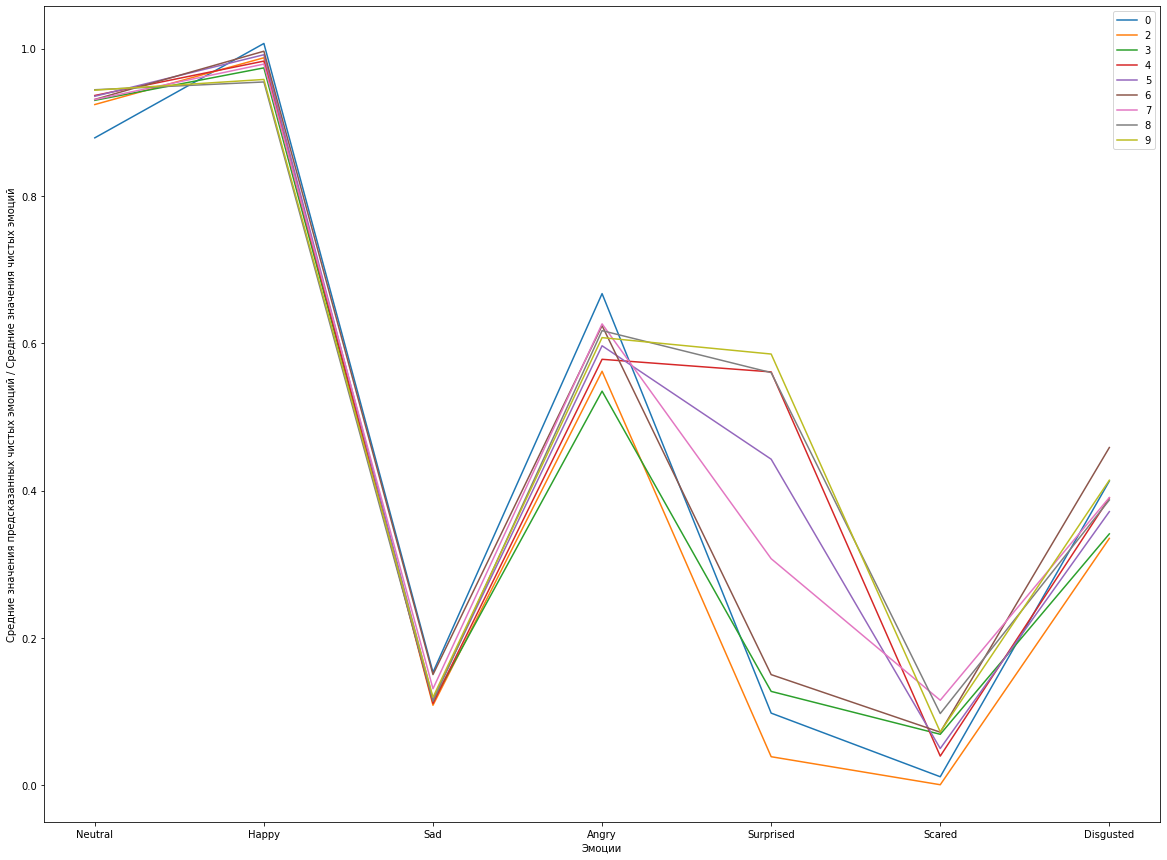

In [76]:
kwargs = {
    'models': models, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics,
    'scale': True
}
df_clear_metrics = tools.plot_emotions(**kwargs)

In [77]:
df_clear_metrics

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,0,0.878922,1.007016,0.153451,0.667472,0.098069,0.011706,0.413054,0.461384
1,2,0.924113,0.987615,0.108744,0.562064,0.038895,0.000857,0.335247,0.422505
2,3,0.929815,0.973881,0.114066,0.535123,0.127559,0.069331,0.341366,0.441591
3,4,0.936401,0.983075,0.111273,0.578317,0.561217,0.039727,0.39005,0.514294
4,5,0.935337,0.991736,0.117371,0.59669,0.442711,0.050028,0.37155,0.500775
5,6,0.931045,0.9965,0.150393,0.624001,0.150319,0.072157,0.458575,0.483284
6,7,0.930888,0.979021,0.131136,0.626432,0.307655,0.115517,0.390706,0.497336
7,8,0.944208,0.954743,0.114197,0.617229,0.560242,0.097493,0.387331,0.525063
8,9,0.943615,0.95816,0.11955,0.607741,0.585463,0.07254,0.414182,0.52875


In [55]:
# import matplotlib.pyplot as plt

# def plot_emotions_(models, df_clear, df_clear_metrics, scale=False, figsize=(20, 15)):
#     plt.figure(figsize=figsize)
#     for i, model_tuple in enumerate(models):
#         entry_dict = {'model': model_tuple[0]}
#         nn = model_tuple[2]
#         clear_metric, emotion_mean_values = nn.model_metric(df_clear, 'clear', scale=scale)
#         entry_dict.update({'clear': clear_metric})
#         for j, emotion in enumerate(df_clear.columns[:7]):
#             entry_dict.update({emotion: emotion_mean_values[j]})
        
#         plt.plot(seven_fields, emotion_mean_values, label=model_tuple[0])
#         # entry_dict.update({metric: df_metrics.iloc[i][metric] for metric in metrics})
#         df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
#     plt.xlabel("Эмоции")
#     plt.ylabel("Средние значения предсказанных чистых эмоций / Средние значения чистых эмоций")
#     plt.legend()
#     plt.show()
#     return df_clear_metrics

In [56]:
# df_clear_metrics.apply(lambda x: np.mean(x[seven_fields]), axis=1)

In [57]:
# models[-1][2].model_metric(df_clear, 'clear', scale=True)

In [277]:
# emotion = 'Scared'
# n = clear_count_dict[emotion]
# statistics_v2(models[0][2], df_clear.sort_values(emotion)[-n:], with_mean=True)

,min_Neutral,max_Neutral,mean_abs_Neutral,min_Happy,max_Happy,mean_abs_Happy,min_Sad,max_Sad,mean_abs_Sad,min_Angry,...,mean_abs_Angry,min_Surprised,max_Surprised,mean_abs_Surprised,min_Scared,max_Scared,mean_abs_Scared,min_Disgusted,max_Disgusted,mean_abs_Disgusted
0,-0.146661,0.030817,0.097125,0.001894,0.002959,0.002482,0.028064,0.042871,0.032967,0.161347,...,0.183676,0.048767,0.056002,0.053466,-0.547048,-0.477869,0.507533,0.028427,0.073582,0.049555


In [78]:
models

[['0', 0, <nn_train.neural_network.NeuralNetwork at 0x7f5c1414c160>],
 ['2', 2, <nn_train.neural_network.NeuralNetwork at 0x7f5bf1e4a3a0>],
 ['3', 3, <nn_train.neural_network.NeuralNetwork at 0x7f5c2c3dbb20>],
 ['4', 4, <nn_train.neural_network.NeuralNetwork at 0x7f5c2c479370>],
 ['5', 5, <nn_train.neural_network.NeuralNetwork at 0x7f5c147c0a60>],
 ['6', 6, <nn_train.neural_network.NeuralNetwork at 0x7f5c144c97f0>],
 ['7', 7, <nn_train.neural_network.NeuralNetwork at 0x7f5bf17b87c0>],
 ['8', 8, <nn_train.neural_network.NeuralNetwork at 0x7f5bf105cbe0>],
 ['9', 9, <nn_train.neural_network.NeuralNetwork at 0x7f5bf18d2e80>]]

In [79]:
df_metrics['N'] = df_metrics['N'].apply(lambda x: int(x))

In [80]:
import matplotlib.pyplot as plt

In [81]:
metrics = tools.metrics.copy() + ['clear']

In [82]:
metrics

['mean', 'norm', 'stat', 'clear']

In [93]:
x = []
y = []
for metric in metrics:
    x.append(df_metrics['N'])
    if metric == 'clear':
        y.append(df_clear_metrics[metric])
    else:
        y.append(df_metrics[metric])

In [94]:
df_metrics

,model,layer,N,mean,norm,stat
0,0,first,0,0.084346,0.230381,0.495604
1,2,first,2,0.064459,0.177864,0.475085
2,3,first,3,0.063164,0.173305,0.482356
3,4,first,4,0.059134,0.162089,0.491156
4,5,first,5,0.062773,0.169153,0.482567
5,6,first,6,0.064500,0.174563,0.490673
6,7,first,7,0.062854,0.170156,0.491686
7,8,first,8,0.056650,0.156193,0.494598
8,9,first,9,0.054908,0.153257,0.499960


In [95]:
df_clear_metrics

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,0,0.878922,1.007016,0.153451,0.667472,0.098069,0.011706,0.413054,0.461384
1,2,0.924113,0.987615,0.108744,0.562064,0.038895,0.000857,0.335247,0.422505
2,3,0.929815,0.973881,0.114066,0.535123,0.127559,0.069331,0.341366,0.441591
3,4,0.936401,0.983075,0.111273,0.578317,0.561217,0.039727,0.39005,0.514294
4,5,0.935337,0.991736,0.117371,0.59669,0.442711,0.050028,0.37155,0.500775
5,6,0.931045,0.9965,0.150393,0.624001,0.150319,0.072157,0.458575,0.483284
6,7,0.930888,0.979021,0.131136,0.626432,0.307655,0.115517,0.390706,0.497336
7,8,0.944208,0.954743,0.114197,0.617229,0.560242,0.097493,0.387331,0.525063
8,9,0.943615,0.95816,0.11955,0.607741,0.585463,0.07254,0.414182,0.52875


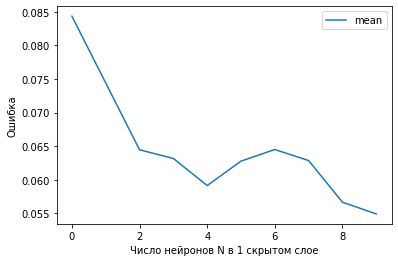

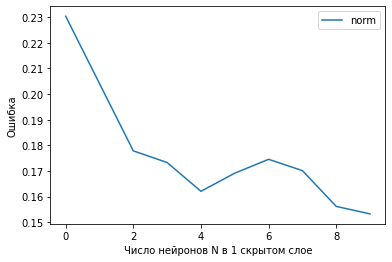

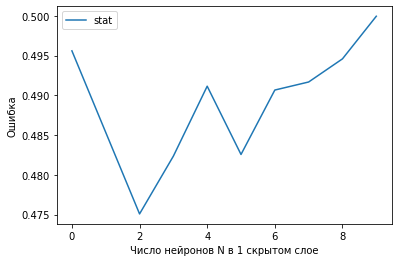

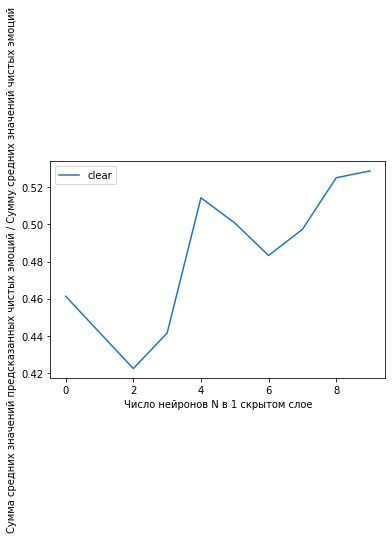

In [96]:
for i in range(len(metrics)):
    plt.plot(x[i], y[i], label=metrics[i])
    plt.xlabel("Число нейронов N в 1 скрытом слое")
    if metrics[i] == 'clear':
        plt.ylabel("Сумма средних значений предсказанных чистых эмоций / Сумму средних значений чистых эмоций")
    else:
        plt.ylabel("Ошибка")
    plt.legend()
    plt.show()

In [97]:
models

[['0', 0, <nn_train.neural_network.NeuralNetwork at 0x7f5c1414c160>],
 ['2', 2, <nn_train.neural_network.NeuralNetwork at 0x7f5bf1e4a3a0>],
 ['3', 3, <nn_train.neural_network.NeuralNetwork at 0x7f5c2c3dbb20>],
 ['4', 4, <nn_train.neural_network.NeuralNetwork at 0x7f5c2c479370>],
 ['5', 5, <nn_train.neural_network.NeuralNetwork at 0x7f5c147c0a60>],
 ['6', 6, <nn_train.neural_network.NeuralNetwork at 0x7f5c144c97f0>],
 ['7', 7, <nn_train.neural_network.NeuralNetwork at 0x7f5bf17b87c0>],
 ['8', 8, <nn_train.neural_network.NeuralNetwork at 0x7f5bf105cbe0>],
 ['9', 9, <nn_train.neural_network.NeuralNetwork at 0x7f5bf18d2e80>]]

In [70]:
# % и df ниже могут быть не актуальными

In [68]:
# statistics_v2(models[-1][2], df_clear) # 9

In [98]:
models[-1][2].statistics(df_clear) # 9

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)


,min_Neutral,max_Neutral,min_Happy,max_Happy,min_Sad,max_Sad,min_Angry,max_Angry,min_Surprised,max_Surprised,min_Scared,max_Scared,min_Disgusted,max_Disgusted
0,-0.352209,0.472131,-0.082918,0.037479,-0.838741,0.111859,-0.39449,0.602429,-0.683773,0.198345,-0.519242,0.020621,-0.678952,0.412917


In [173]:
# statistics_v2(models[-1][2], df_clear, with_mean=True) # 9

,min_Neutral,max_Neutral,mean_abs_Neutral,min_Happy,max_Happy,mean_abs_Happy,min_Sad,max_Sad,mean_abs_Sad,min_Angry,...,mean_abs_Angry,min_Surprised,max_Surprised,mean_abs_Surprised,min_Scared,max_Scared,mean_abs_Scared,min_Disgusted,max_Disgusted,mean_abs_Disgusted
0,-0.310974,0.526172,0.064556,-0.076664,0.055388,0.020046,-0.847615,0.111615,0.038811,-0.452202,...,0.084947,-0.636043,0.207614,0.029809,-0.444373,0.029675,0.010128,-0.621326,0.401345,0.074846


In [85]:
models[-1][2].statistics(df_clear, with_mean=True) # 9

,min_Neutral,max_Neutral,mean_abs_Neutral,min_Happy,max_Happy,mean_abs_Happy,min_Sad,max_Sad,mean_abs_Sad,min_Angry,...,mean_abs_Angry,min_Surprised,max_Surprised,mean_abs_Surprised,min_Scared,max_Scared,mean_abs_Scared,min_Disgusted,max_Disgusted,mean_abs_Disgusted
0,-0.291814,0.538687,0.065139,-0.062539,0.065838,0.025892,-0.839523,0.113978,0.040826,-0.435471,...,0.083963,-0.728478,0.195025,0.030454,-0.522352,0.052044,0.01785,-0.655505,0.355617,0.072945


In [123]:
# statistics_v2(models[-3][2], df_clear) # 7

,min_Neutral,max_Neutral,min_Happy,max_Happy,min_Sad,max_Sad,min_Angry,max_Angry,min_Surprised,max_Surprised,min_Scared,max_Scared,min_Disgusted,max_Disgusted
0,-0.313933,0.531795,-0.069168,0.06376,-0.836109,0.116133,-0.410572,0.577302,-0.816417,0.262167,-0.514351,0.041133,-0.584647,0.406114


In [180]:
# res_4 = statistics_v2(models[3][2], df_clear) # 4
# res_4

,min_Neutral,max_Neutral,min_Happy,max_Happy,min_Sad,max_Sad,min_Angry,max_Angry,min_Surprised,max_Surprised,min_Scared,max_Scared,min_Disgusted,max_Disgusted
0,-0.357518,0.462108,-0.048654,0.059517,-0.828337,0.128351,-0.466997,0.528474,-0.961162,0.056299,-0.532849,0.021063,-0.663613,0.33817


In [181]:
# res_5 = statistics_v2(models[4][2], df_clear) # 5
# res_5

,min_Neutral,max_Neutral,min_Happy,max_Happy,min_Sad,max_Sad,min_Angry,max_Angry,min_Surprised,max_Surprised,min_Scared,max_Scared,min_Disgusted,max_Disgusted
0,-0.329826,0.509112,-0.057815,0.056925,-0.813568,0.139335,-0.384835,0.645821,-0.878475,0.203451,-0.497857,0.07029,-0.638489,0.437992


In [191]:
# np.sum(np.absolute(res_4.values) - np.absolute(res_5.values)) / len(res_5.values[0])

-0.015048507068838392

In [99]:
# df_clear.sort_values('Surprised')[-20:]

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:06.800_Zaharova_5,0.12,0.01,0.0,0.0,0.94,0.0,0.0,0.01,0.82
00:00:03.400_Zaharova_5,0.07,0.00,0.0,0.0,0.95,0.0,0.0,0.00,0.63
00:00:03.500_Zaharova_5,0.05,0.00,0.0,0.0,0.96,0.0,0.0,0.00,0.64
00:00:06.700_Zaharova_5,0.08,0.01,0.0,0.0,0.97,0.0,0.0,0.00,0.83
00:00:03.800_Zaharova_5,0.04,0.00,0.0,0.0,0.97,0.0,0.0,0.00,0.65
00:00:06.100_Zaharova_5,0.04,0.00,0.0,0.0,0.98,0.0,0.0,0.00,0.87
00:00:04.000_Zaharova_5,0.03,0.00,0.0,0.0,0.98,0.0,0.0,0.00,0.69
00:00:04.600_Zaharova_5,0.04,0.00,0.0,0.0,0.98,0.0,0.0,0.00,0.84
00:00:06.400_Zaharova_5,0.05,0.00,0.0,0.0,0.98,0.0,0.0,0.00,0.85


In [107]:
# models[-1][2].predict(df_clear.sort_values('Surprised')).sort_values('Surprised') # 9

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:40.000_Куликов Алексей_1,0.103401,9.452761e-16,0.110125,0.477560,0.000003,0.007211,0.408525
00:00:40.300_Куликов Алексей_1,0.101401,9.619253e-16,0.108830,0.479597,0.000003,0.007458,0.407223
00:00:39.800_Куликов Алексей_1,0.109470,1.279732e-15,0.111615,0.472653,0.000003,0.007219,0.405443
00:00:40.500_Куликов Алексей_1,0.099435,9.788680e-16,0.107548,0.481634,0.000003,0.007714,0.405922
00:00:39.900_Куликов Алексей_1,0.107367,1.302272e-15,0.110305,0.474687,0.000003,0.007466,0.404143
...,...,...,...,...,...,...,...
00:00:06.000_Zaharova_5,0.275175,4.110998e-02,0.002943,0.000329,0.744804,0.015102,0.000720
00:00:05.700_Zaharova_5,0.265045,4.046524e-02,0.002880,0.000308,0.757517,0.015699,0.000712
00:00:05.300_Zaharova_5,0.255157,3.983024e-02,0.002819,0.000288,0.769792,0.016319,0.000704


In [109]:
# models[-1][2].get_diff(test).sort_values('Surprised')

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:08.900_Zaharova_5,0.134256,0.017606,0.000005,-0.000016,-0.773756,-0.002843,5.164065e-07
00:00:09.000_Zaharova_5,0.082009,0.052035,-0.000008,-0.000012,-0.771769,-0.002472,-4.735851e-06
00:00:09.100_Zaharova_5,0.038783,0.058028,-0.000009,-0.000010,-0.745978,-0.002168,-5.090242e-06
00:00:08.800_Zaharova_5,0.175756,-0.020934,0.000073,-0.000017,-0.724889,-0.003139,2.406507e-05
00:00:09.200_Zaharova_5,0.016276,0.057411,-0.000007,-0.000008,-0.719845,-0.002135,-5.369965e-06
...,...,...,...,...,...,...,...
00:00:03.600_Nasyrov_6,-0.333204,0.013882,-0.007592,-0.052148,0.587423,0.011480,5.990543e-04
00:00:03.500_Nasyrov_6,-0.296912,0.017072,-0.011422,-0.047159,0.609397,0.008586,6.263458e-04
00:00:03.200_Nasyrov_6,-0.200961,0.025215,-0.023259,-0.032764,0.615352,0.004493,7.218395e-04


In [93]:
# models[-3][2].predict(df_clear.sort_values('Surprised')[-20:]) # 7

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:06.800_Zaharova_5,0.345084,0.001939,0.000472,0.001220,0.287119,0.003743,0.000092
00:00:03.400_Zaharova_5,0.595017,0.004599,0.001603,0.003612,0.146086,0.004494,0.000365
00:00:03.500_Zaharova_5,0.581795,0.004327,0.001516,0.003440,0.151739,0.004468,0.000343
00:00:06.700_Zaharova_5,0.330207,0.001358,0.000521,0.001365,0.294540,0.003993,0.000105
00:00:03.800_Zaharova_5,0.568454,0.004072,0.001433,0.003277,0.157570,0.004441,0.000322
00:00:06.100_Zaharova_5,0.283809,0.001064,0.000416,0.001123,0.332923,0.003900,0.000082
00:00:04.000_Zaharova_5,0.514283,0.003191,0.001144,0.002698,0.182727,0.004338,0.000251
00:00:04.600_Zaharova_5,0.318246,0.001278,0.000492,0.001300,0.303894,0.003969,0.000099
00:00:06.400_Zaharova_5,0.306519,0.001202,0.000465,0.001238,0.313413,0.003946,0.000093


### Сохраняем все модели

In [99]:
dir_model = 'saved_models'
layer = 'first'
path_dir_model = os.path.join(project_dir_path, dir_model, layer, '_1')
for model_tuple in models:
    N = model_tuple[1]
    nn = model_tuple[2]
    save_name = f'model_first_{N}'
    path = os.path.join(path_dir_model, save_name)
    nn.model.save(path)

2024-03-13 16:26:24.616642: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_1/model_first_0/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_1/model_first_2/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_1/model_first_3/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_1/model_first_4/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_1/model_first_5/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_1/model_first_6/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_1/model_first_7/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/

### Дообучение

In [100]:
test = nn.get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [101]:
len(models)

9

In [76]:
# '22'.split('_')

In [102]:
df_metrics_2 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_2

,model,layer,N,mean,norm,stat


In [89]:
# v = 2
# for nn_tuple in models:
#     nn_list[0] = nn_list[0].split('_')[0] + f'_{v}'
#     nn = nn_tuple[2]
#     print('refit', nn_tuple[0])
#     df_train = nn.create_train_df_from_diff(test)
#     nn.fit(df_train, epochs=20, batch_size=20)
#     entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
#     entry_dict.update({metric: nn.model_metric(test, metric) for metric in tools.metrics})
#     df_metrics = df_metrics.append(entry_dict, ignore_index = True)
#     print(entry_dict)

refit 0
Epoch 1/20
286/286 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 2/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 3/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0200
Epoch 4/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0199
Epoch 5/20
286/286 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 6/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0199
Epoch 7/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0198
Epoch 8/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0198
Epoch 9/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0198
Epoch 10/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 11/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 12/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 13/20
286/2

234/234 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 19/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 20/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0153
{'model': '9_2', 'layer': 'first', 'N': 9, 'mean': 0.07720053089756103, 'norm': 0.21137548927072805, 'stat': 0.4776668, 'clear': (0.4845936, [0.8169085, 0.8889814, 0.11247035, 0.53638005, 0.6203548, 0.037597835, 0.37946197])}


In [103]:
v = 2
df_metrics_2 = tools.refitting(models, test, df_metrics_2, v=v)

refit 0_2
Epoch 1/20
286/286 [==============================] - 1s 2ms/step - loss: 0.0205
Epoch 2/20
286/286 [==============================] - 1s 2ms/step - loss: 0.0201
Epoch 3/20
286/286 [==============================] - 1s 2ms/step - loss: 0.0200
Epoch 4/20
286/286 [==============================] - 1s 2ms/step - loss: 0.0200
Epoch 5/20
286/286 [==============================] - 1s 2ms/step - loss: 0.0200
Epoch 6/20
286/286 [==============================] - 1s 2ms/step - loss: 0.0199
Epoch 7/20
286/286 [==============================] - 1s 2ms/step - loss: 0.0199
Epoch 8/20
286/286 [==============================] - 1s 2ms/step - loss: 0.0198
Epoch 9/20
286/286 [==============================] - 1s 2ms/step - loss: 0.0198
Epoch 10/20
286/286 [==============================] - 1s 2ms/step - loss: 0.0198
Epoch 11/20
286/286 [==============================] - 1s 2ms/step - loss: 0.0197
Epoch 12/20
286/286 [==============================] - 1s 2ms/step - loss: 0.0197
Epoch 13/20
286

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)


{'model': '0_2', 'layer': 'first', 'N': 0, 'mean': 0.09594336619590177, 'norm': 0.2625246294505433, 'stat': 0.4861394443682262}
refit 2_2
Epoch 1/20
238/238 [==============================] - 1s 2ms/step - loss: 0.0176
Epoch 2/20
238/238 [==============================] - 1s 2ms/step - loss: 0.0174
Epoch 3/20
238/238 [==============================] - 1s 2ms/step - loss: 0.0173
Epoch 4/20
238/238 [==============================] - 1s 2ms/step - loss: 0.0172
Epoch 5/20
238/238 [==============================] - 1s 2ms/step - loss: 0.0171
Epoch 6/20
238/238 [==============================] - 1s 2ms/step - loss: 0.0170
Epoch 7/20
238/238 [==============================] - 1s 3ms/step - loss: 0.0169
Epoch 8/20
238/238 [==============================] - 1s 3ms/step - loss: 0.0169
Epoch 9/20
238/238 [==============================] - 1s 2ms/step - loss: 0.0168
Epoch 10/20
238/238 [==============================] - 1s 2ms/step - loss: 0.0168
Epoch 11/20
238/238 [==============================

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)


{'model': '2_2', 'layer': 'first', 'N': 2, 'mean': 0.08281300357869245, 'norm': 0.22287938071155966, 'stat': 0.4635713201548372}
refit 3_2
Epoch 1/20
243/243 [==============================] - 1s 2ms/step - loss: 0.0168
Epoch 2/20
243/243 [==============================] - 1s 2ms/step - loss: 0.0165
Epoch 3/20
243/243 [==============================] - 1s 2ms/step - loss: 0.0164
Epoch 4/20
243/243 [==============================] - 1s 2ms/step - loss: 0.0162
Epoch 5/20
243/243 [==============================] - 1s 2ms/step - loss: 0.0161
Epoch 6/20
243/243 [==============================] - 1s 2ms/step - loss: 0.0160
Epoch 7/20
243/243 [==============================] - 1s 2ms/step - loss: 0.0160
Epoch 8/20
243/243 [==============================] - 1s 2ms/step - loss: 0.0159
Epoch 9/20
243/243 [==============================] - 1s 2ms/step - loss: 0.0159
Epoch 10/20
243/243 [==============================] - 1s 2ms/step - loss: 0.0158
Epoch 11/20
243/243 [=============================

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)


{'model': '3_2', 'layer': 'first', 'N': 3, 'mean': 0.08475358869790461, 'norm': 0.22563205630494626, 'stat': 0.4639723662819181}
refit 4_2
Epoch 1/20
233/233 [==============================] - 1s 2ms/step - loss: 0.0166
Epoch 2/20
233/233 [==============================] - 1s 2ms/step - loss: 0.0163
Epoch 3/20
233/233 [==============================] - 1s 2ms/step - loss: 0.0162
Epoch 4/20
233/233 [==============================] - 1s 2ms/step - loss: 0.0161
Epoch 5/20
233/233 [==============================] - 1s 2ms/step - loss: 0.0160
Epoch 6/20
233/233 [==============================] - 1s 2ms/step - loss: 0.0159
Epoch 7/20
233/233 [==============================] - 1s 2ms/step - loss: 0.0159
Epoch 8/20
233/233 [==============================] - 1s 2ms/step - loss: 0.0158
Epoch 9/20
233/233 [==============================] - 1s 2ms/step - loss: 0.0158
Epoch 10/20
233/233 [==============================] - 1s 2ms/step - loss: 0.0157
Epoch 11/20
233/233 [=============================

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)


{'model': '4_2', 'layer': 'first', 'N': 4, 'mean': 0.07676382789624084, 'norm': 0.21124030972610747, 'stat': 0.47433059236833025}
refit 5_2
Epoch 1/20
240/240 [==============================] - 1s 2ms/step - loss: 0.0165
Epoch 2/20
240/240 [==============================] - 1s 2ms/step - loss: 0.0162
Epoch 3/20
240/240 [==============================] - 1s 2ms/step - loss: 0.0160
Epoch 4/20
240/240 [==============================] - 1s 2ms/step - loss: 0.0159
Epoch 5/20
240/240 [==============================] - 1s 2ms/step - loss: 0.0157
Epoch 6/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 7/20
240/240 [==============================] - 1s 2ms/step - loss: 0.0156
Epoch 8/20
240/240 [==============================] - 1s 2ms/step - loss: 0.0155
Epoch 9/20
240/240 [==============================] - 1s 2ms/step - loss: 0.0155
Epoch 10/20
240/240 [==============================] - 1s 2ms/step - loss: 0.0154
Epoch 11/20
240/240 [============================

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)


{'model': '5_2', 'layer': 'first', 'N': 5, 'mean': 0.08044583661853233, 'norm': 0.21769804921945576, 'stat': 0.4639980750424521}
refit 6_2
Epoch 1/20
239/239 [==============================] - 1s 2ms/step - loss: 0.0169
Epoch 2/20
239/239 [==============================] - 1s 2ms/step - loss: 0.0167
Epoch 3/20
239/239 [==============================] - 1s 2ms/step - loss: 0.0165
Epoch 4/20
239/239 [==============================] - 1s 2ms/step - loss: 0.0163
Epoch 5/20
239/239 [==============================] - 1s 2ms/step - loss: 0.0163
Epoch 6/20
239/239 [==============================] - 1s 2ms/step - loss: 0.0162
Epoch 7/20
239/239 [==============================] - 1s 2ms/step - loss: 0.0161
Epoch 8/20
239/239 [==============================] - 1s 2ms/step - loss: 0.0160
Epoch 9/20
239/239 [==============================] - 1s 2ms/step - loss: 0.0160
Epoch 10/20
239/239 [==============================] - 1s 2ms/step - loss: 0.0159
Epoch 11/20
239/239 [=============================

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)


{'model': '6_2', 'layer': 'first', 'N': 6, 'mean': 0.08075434743782688, 'norm': 0.21697033496586, 'stat': 0.4636919030121395}
refit 7_2
Epoch 1/20
234/234 [==============================] - 1s 2ms/step - loss: 0.0171
Epoch 2/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 3/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 4/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0165
Epoch 5/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 6/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 7/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 8/20
234/234 [==============================] - 1s 2ms/step - loss: 0.0161
Epoch 9/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 10/20
234/234 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 11/20
234/234 [==============================] 

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)


{'model': '7_2', 'layer': 'first', 'N': 7, 'mean': 0.0811508137302747, 'norm': 0.22051312709233456, 'stat': 0.46317080142242567}
refit 8_2
Epoch 1/20
229/229 [==============================] - 1s 2ms/step - loss: 0.0166
Epoch 2/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 3/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 4/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 5/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 6/20
229/229 [==============================] - 1s 2ms/step - loss: 0.0159
Epoch 7/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 8/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 9/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 10/20
229/229 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 11/20
229/229 [=============================

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)


{'model': '8_2', 'layer': 'first', 'N': 8, 'mean': 0.07145191566183066, 'norm': 0.19870542904622415, 'stat': 0.4777840258819716}
refit 9_2
Epoch 1/20
231/231 [==============================] - 1s 2ms/step - loss: 0.0162
Epoch 2/20
231/231 [==============================] - 1s 2ms/step - loss: 0.0160
Epoch 3/20
231/231 [==============================] - 1s 2ms/step - loss: 0.0159
Epoch 4/20
231/231 [==============================] - 1s 2ms/step - loss: 0.0158
Epoch 5/20
231/231 [==============================] - 1s 2ms/step - loss: 0.0158
Epoch 6/20
231/231 [==============================] - 1s 2ms/step - loss: 0.0157
Epoch 7/20
231/231 [==============================] - 1s 2ms/step - loss: 0.0157
Epoch 8/20
231/231 [==============================] - 1s 2ms/step - loss: 0.0156
Epoch 9/20
231/231 [==============================] - 1s 2ms/step - loss: 0.0156
Epoch 10/20
231/231 [==============================] - 1s 2ms/step - loss: 0.0156
Epoch 11/20
231/231 [=============================

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)


In [76]:
# str_ = log refitting - Забыл сохранить результат в df_metrics_2

In [77]:
# import json

# lines = [line for line in str_.split('\n') if line.startswith('{')]
# lines = [line.replace("'", '"') for line in lines]
# for line in lines:
#     df_metrics_2 = df_metrics_2.append(json.loads(line), ignore_index = True)

In [111]:
# df_metrics = df_metrics.drop('clear', 1)
df_metrics_2

,model,layer,N,mean,norm,stat
0,0_2,first,0,0.096398,0.263710,0.485441
1,2_2,first,2,0.083028,0.222784,0.461403
2,3_2,first,3,0.085082,0.226568,0.464967
3,4_2,first,4,0.077502,0.213058,0.474124
4,5_2,first,5,0.081087,0.219581,0.464040
5,6_2,first,6,0.081384,0.219668,0.465280
6,7_2,first,7,0.081797,0.221435,0.465178
7,8_2,first,8,0.071896,0.199914,0.478278
8,9_2,first,9,0.068928,0.193882,0.480796


In [112]:
df_clear_metrics_2 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_2

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear


In [97]:
# models # prev

[('0', 0, <nn_train.neural_network.NeuralNetwork at 0x7f1a9278bf40>),
 ('2', 2, <nn_train.neural_network.NeuralNetwork at 0x7f1a81018f10>),
 ('3', 3, <nn_train.neural_network.NeuralNetwork at 0x7f1a81055ca0>),
 ('4', 4, <nn_train.neural_network.NeuralNetwork at 0x7f1a809a0820>),
 ('5', 5, <nn_train.neural_network.NeuralNetwork at 0x7f1a808ba760>),
 ('6', 6, <nn_train.neural_network.NeuralNetwork at 0x7f1a807fa370>),
 ('7', 7, <nn_train.neural_network.NeuralNetwork at 0x7f1a90124cd0>),
 ('8', 8, <nn_train.neural_network.NeuralNetwork at 0x7f1a80e95b20>),
 ('9', 9, <nn_train.neural_network.NeuralNetwork at 0x7f1a80ecab50>)]

In [103]:
# for i in range(len(models)):
#     models[i] = list(models[i])

In [84]:
models # cur

[['0_2', 0, <nn_train.neural_network.NeuralNetwork at 0x7f406affd340>],
 ['2_2', 2, <nn_train.neural_network.NeuralNetwork at 0x7f4068704a00>],
 ['3_2', 3, <nn_train.neural_network.NeuralNetwork at 0x7f40505fd0a0>],
 ['4_2', 4, <nn_train.neural_network.NeuralNetwork at 0x7f405053c700>],
 ['5_2', 5, <nn_train.neural_network.NeuralNetwork at 0x7f4031f7dca0>],
 ['6_2', 6, <nn_train.neural_network.NeuralNetwork at 0x7f4050064a60>],
 ['7_2', 7, <nn_train.neural_network.NeuralNetwork at 0x7f4050619340>],
 ['8_2', 8, <nn_train.neural_network.NeuralNetwork at 0x7f40506f2670>],
 ['9_2', 9, <nn_train.neural_network.NeuralNetwork at 0x7f405016e7f0>]]

In [105]:
# for nn_tuple in models:
#     nn_tuple[0] = nn_tuple[0].split('_')[0] + f'_{v}'

In [85]:
models # should be

[['0_2', 0, <nn_train.neural_network.NeuralNetwork at 0x7f406affd340>],
 ['2_2', 2, <nn_train.neural_network.NeuralNetwork at 0x7f4068704a00>],
 ['3_2', 3, <nn_train.neural_network.NeuralNetwork at 0x7f40505fd0a0>],
 ['4_2', 4, <nn_train.neural_network.NeuralNetwork at 0x7f405053c700>],
 ['5_2', 5, <nn_train.neural_network.NeuralNetwork at 0x7f4031f7dca0>],
 ['6_2', 6, <nn_train.neural_network.NeuralNetwork at 0x7f4050064a60>],
 ['7_2', 7, <nn_train.neural_network.NeuralNetwork at 0x7f4050619340>],
 ['8_2', 8, <nn_train.neural_network.NeuralNetwork at 0x7f40506f2670>],
 ['9_2', 9, <nn_train.neural_network.NeuralNetwork at 0x7f405016e7f0>]]

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method 

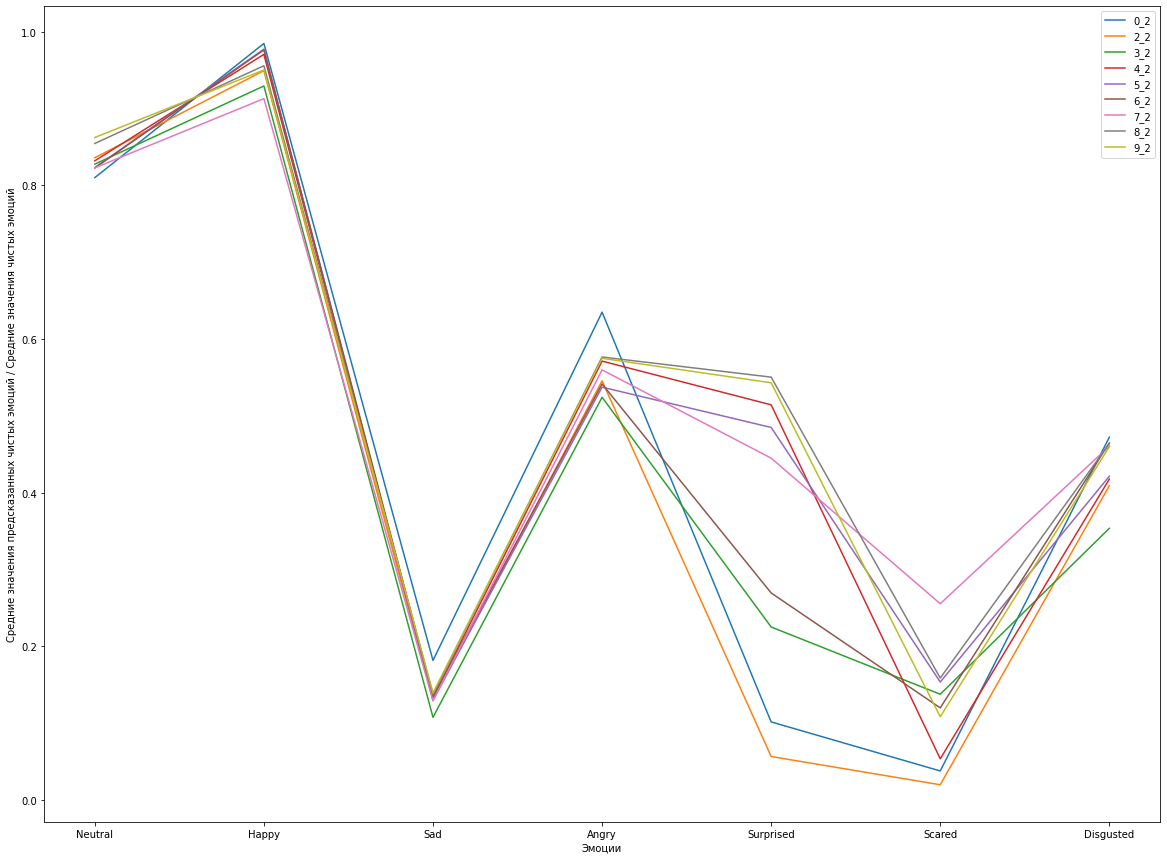

In [118]:
kwargs = {
    'models': models, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_2,
    'scale': True
}
df_clear_metrics_2 = tools.plot_emotions(**kwargs)

In [221]:
# df_metrics.iloc[-(n // v):]

In [119]:
df_clear_metrics_2

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,0_2,0.810249,0.984909,0.181697,0.635112,0.10165,0.037817,0.472378,0.460545
1,2_2,0.836113,0.94952,0.129314,0.54568,0.05661,0.01987,0.409219,0.420904
2,3_2,0.827797,0.929571,0.1076,0.52433,0.225234,0.137651,0.353667,0.443693
3,4_2,0.832119,0.970714,0.133369,0.571355,0.514438,0.05363,0.41777,0.499056
4,5_2,0.823398,0.977518,0.130642,0.537472,0.48502,0.153596,0.421484,0.504161
5,6_2,0.822853,0.976534,0.13475,0.541614,0.269536,0.119921,0.464927,0.475734
6,7_2,0.823001,0.913093,0.129391,0.559961,0.445038,0.255517,0.460713,0.512387
7,8_2,0.854709,0.95588,0.137697,0.57674,0.550518,0.158739,0.464084,0.528338
8,9_2,0.862489,0.950373,0.139368,0.575016,0.543168,0.108403,0.459977,0.519828


In [120]:
metrics

['mean', 'norm', 'stat', 'clear']

In [93]:
# def create_metric_df_dict(metrics, df_metrics, df_clear_metrics):
#     metric_df_dict = {metric: df_metrics for metric in metrics[:-1]}
#     metric_df_dict.update({metrics[-1]: df_clear_metrics})
#     return metric_df_dict

In [121]:
metric_df_dict = tools.create_metric_df_dict(metrics, df_metrics_2, df_clear_metrics_2)
metric_df_dict

{'mean':   model  layer  N      mean      norm      stat
 0   0_2  first  0  0.096398  0.263710  0.485441
 1   2_2  first  2  0.083028  0.222784  0.461403
 2   3_2  first  3  0.085082  0.226568  0.464967
 3   4_2  first  4  0.077502  0.213058  0.474124
 4   5_2  first  5  0.081087  0.219581  0.464040
 5   6_2  first  6  0.081384  0.219668  0.465280
 6   7_2  first  7  0.081797  0.221435  0.465178
 7   8_2  first  8  0.071896  0.199914  0.478278
 8   9_2  first  9  0.068928  0.193882  0.480796,
 'norm':   model  layer  N      mean      norm      stat
 0   0_2  first  0  0.096398  0.263710  0.485441
 1   2_2  first  2  0.083028  0.222784  0.461403
 2   3_2  first  3  0.085082  0.226568  0.464967
 3   4_2  first  4  0.077502  0.213058  0.474124
 4   5_2  first  5  0.081087  0.219581  0.464040
 5   6_2  first  6  0.081384  0.219668  0.465280
 6   7_2  first  7  0.081797  0.221435  0.465178
 7   8_2  first  8  0.071896  0.199914  0.478278
 8   9_2  first  9  0.068928  0.193882  0.480796,
 '

In [ ]:
# metric_df_dict = {metric: df_metrics for metric in metrics[:-1]}
# metric_df_dict.update({metric[-1]: df_clear_metrics})
# df_ = metric_df_dict[metric]
# df_[metric]

#     for metric in metrics:
#         df_ = metric_df_dict[metric]
#         x.append(df_metrics['N'])
#         if metric == 'clear':
#             y.append(df_clear_metrics[metric])
#         else:
#             y.append(df_metrics[metric])

In [96]:
# {1:2}.keys()

dict_keys([1])

In [97]:
# def plot_metrics(metric_df_dict, layer='first'):
#     # dependencies
#     mean_ = 'mean'
#     clear = 'clear'
    
#     x = []
#     y = []
    
#     df_metrics = metric_df_dict[mean_]
#     metrics = list(metric_df_dict.keys())
    
#     for metric in metrics:
#         if layer == 'first':
#             x.append(df_metrics['N'])
#         else:
#             x.append(df_metrics.index)
#         df_ = metric_df_dict[metric]
#         y.append(df_[metric])
    
#     for i in range(len(metrics)):
#         plt.plot(x[i], y[i], label=metrics[i])
#         plt.xlabel("Число нейронов N в 1 скрытом слое")
#         if metrics[i] == clear:
#             plt.ylabel("Сумма средних значений предсказанных чистых эмоций / Сумму средних значений чистых эмоций")
#         else:
#             plt.ylabel("Ошибка")
#         plt.legend()
#         plt.show()

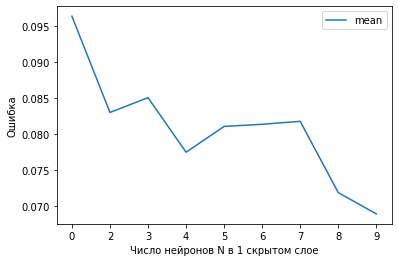

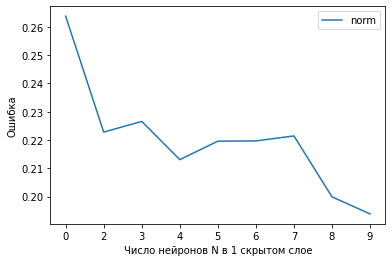

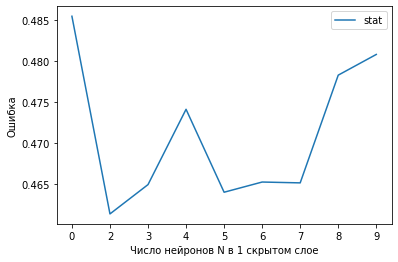

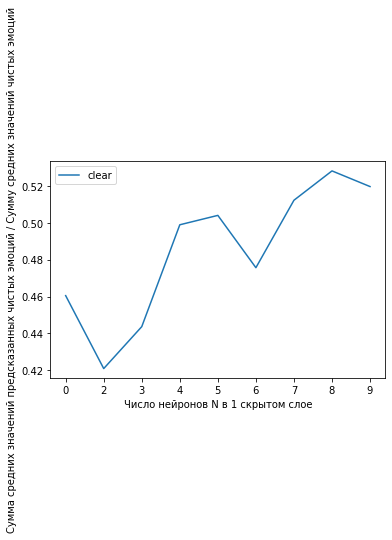

In [122]:
tools.plot_metrics(metric_df_dict)

In [88]:
# x = []
# y = []
# for metric in metrics:
#     x.append(df_metrics['N'])
#     if metric == 'clear':
#         y.append(df_clear_metrics_2[metric])
#     else:
#         y.append(df_metrics[metric])

In [100]:
# for i in range(len(metrics)):
#     plt.plot(x[i], y[i], label=metrics[i])
#     plt.xlabel("Число нейронов N в 1 скрытом слое")
#     if metrics[i] == 'clear':
#         plt.ylabel("Сумма средних значений предсказанных чистых эмоций / Сумму средних значений чистых эмоций")
#     else:
#         plt.ylabel("Ошибка")
#     plt.legend()
#     plt.show()

In [190]:
# x = []
# y = []
# for metric in metrics:
#     x.append(df_metrics[-(n // v):]['N'])
#     y.append(df_metrics[-(n // v):][metric])

In [101]:
# for i in range(len(metrics)):
#     plt.plot(x[i], y[i], label=metrics[i])
#     plt.xlabel("Число нейронов N в 1 скрытом слое")
#     plt.ylabel("Ошибка")
#     plt.legend()
#     plt.show()

In [195]:
# dir_path = '../saved_models/first/'
# save_name = 'model_first_6_2'
# path = os.path.join(dir_path, save_name)
# path

'../saved_models/first/model_first_6_2'

In [197]:
# models[5]

('6', 6, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc72210f10>)

In [199]:
# models[5][2].model.save(path)

INFO:tensorflow:Assets written to: ../saved_models/first/model_first_6_2/assets


### Сохраняем все модели

In [103]:
# def save_models(models, path_to_saved_models, layer='first', v=1):
#     dir_path = os.path.join(path_to_saved_models, layer, f'_{v}')
#     for model_list in models:
#         N = model_list[1]
#         nn = model_list[2]
#         save_name = f'model_{layer}_{N}_{v}'
#         path = os.path.join(dir_path, save_name)
#         nn.model.save(path)

In [123]:
models

[['0_2', 0, <nn_train.neural_network.NeuralNetwork at 0x7f5bf18c7730>],
 ['2_2', 2, <nn_train.neural_network.NeuralNetwork at 0x7f5c2c43fc40>],
 ['3_2', 3, <nn_train.neural_network.NeuralNetwork at 0x7f5c147c01c0>],
 ['4_2', 4, <nn_train.neural_network.NeuralNetwork at 0x7f5c1404fee0>],
 ['5_2', 5, <nn_train.neural_network.NeuralNetwork at 0x7f5bf2e17eb0>],
 ['6_2', 6, <nn_train.neural_network.NeuralNetwork at 0x7f5bf193fdf0>],
 ['7_2', 7, <nn_train.neural_network.NeuralNetwork at 0x7f5bf1907a60>],
 ['8_2', 8, <nn_train.neural_network.NeuralNetwork at 0x7f5bf177e8b0>],
 ['9_2', 9, <nn_train.neural_network.NeuralNetwork at 0x7f5bf1707b20>]]

In [124]:
v

2

In [128]:
path_to_saved_models = os.path.join(project_dir_path, dir_model)
tools.save_models(models, path_to_saved_models, layer, v=v)

INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_2/model_first_0_2/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_2/model_first_2_2/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_2/model_first_3_2/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_2/model_first_4_2/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_2/model_first_5_2/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_2/model_first_6_2/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_2/model_first_7_2/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий с

In [129]:
full_df_list

[                                  Neutral  Happy   Sad  Angry  Surprised  \
 Index_                                                                     
 00:00:11.800_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
 00:00:11.939_Боим_1                  0.99   0.00  0.00   0.00       0.01   
 00:00:10.400_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
 00:00:05.700_Zaharova_1              0.99   0.00  0.00   0.00       0.01   
 00:00:08.090_Боим_1                  0.99   0.00  0.01   0.01       0.01   
 ...                                   ...    ...   ...    ...        ...   
 00:00:17.500_Смолин Александр_1      0.02   0.96  0.00   0.00       0.00   
 00:00:20.900_Aleksashina_1           0.01   0.98  0.00   0.00       0.00   
 00:00:16.900_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
 00:00:17.000_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
 00:00:15.000_Aleksashina_1           0.01   0.99  0.00   0.00       0.00   

In [130]:
percent_df_list

[                             Neutral  Happy  Sad  Angry  Surprised  Scared  \
 Index_                                                                       
 00:00:00.030_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.060_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.090_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.121_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.151_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 ...                              ...    ...  ...    ...        ...     ...   
 00:00:11.696_Fomin_6            0.05   0.93  0.0    0.0       0.00     0.0   
 00:00:04.060_Керов Андрей_2     0.04   0.94  0.0    0.0       0.00     0.0   
 00:00:11.909_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
 00:00:11.969_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
 00:00:13.100_Aleksashina_1      0.02   0.97  0.0   

In [131]:
df_train, df_test = nn.train_test_split(full_df_list, percent_df_list)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:01:10.600_Смолин Александр_1,0.92,0.00,0.01,0.09,0.02,0.00,0.00,-0.09,0.32
00:01:26.800_Aleksashina_1,0.40,0.66,0.00,0.00,0.00,0.00,0.00,0.66,0.41
00:00:00.606_Керов Андрей_2,0.99,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.25
00:01:17.200_Турчина Екатерина_1,0.64,0.00,0.03,0.01,0.05,0.09,0.00,-0.12,0.54
00:00:07.393_Керов Андрей_2,0.02,0.95,0.00,0.00,0.00,0.00,0.00,0.95,0.51
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.00,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.00,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.00,0.99,-0.99,0.62


In [132]:
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [133]:
df_metrics_3 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_3

,model,layer,N,mean,norm,stat


In [134]:
df_train_, df_test = nn.train_test_split(full_df_list, percent_df_list)
df_train_

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:01:32.000_Лебедев Андрей_1,0.97,0.00,0.01,0.02,0.01,0.0,0.00,-0.02,0.27
00:00:01.515_Korsakov_4,0.98,0.00,0.01,0.01,0.01,0.0,0.00,-0.01,0.28
00:01:16.400_Бондаренко Денис_2,0.98,0.00,0.00,0.01,0.01,0.0,0.00,-0.01,0.29
00:00:06.636_Fomin_10,0.19,0.70,0.00,0.00,0.00,0.0,0.00,0.70,0.49
00:00:10.333_Fomin_2,0.35,0.48,0.00,0.01,0.00,0.0,0.00,0.48,0.44
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [135]:
v = 3
df_metrics_3 = tools.refitting(models, test, df_metrics_3, df_train=df_train_, v=v, type_='split')

refit 0_3
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0117
Epoch 2/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0115
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0114
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0114
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0113
Epoch 6/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0113
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0113
Epoch 8/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0113
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0113
Epoch 10/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0112
Epoch 11/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0112
Epoch 12/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0112
Epoch 13/20
916

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)


{'model': '0_3', 'layer': 'first', 'N': 0, 'mean': 0.08287407764658922, 'norm': 0.2264698815429889, 'stat': 0.5053001043519804}
refit 2_3
Epoch 1/20
916/916 [==============================] - 3s 2ms/step - loss: 0.0080
Epoch 2/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0076
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0075
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0075
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0075
Epoch 6/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0075
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0075
Epoch 8/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0075
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0075
Epoch 10/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0075
Epoch 11/20
916/916 [==============================

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)


{'model': '2_3', 'layer': 'first', 'N': 2, 'mean': 0.06356926175055148, 'norm': 0.17613836921690296, 'stat': 0.47788980629827293}
refit 3_3
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0074
Epoch 2/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0069
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0068
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0067
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0066
Epoch 6/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0066
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0066
Epoch 8/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0065
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0065
Epoch 10/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0064
Epoch 11/20
916/916 [============================

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)


{'model': '3_3', 'layer': 'first', 'N': 3, 'mean': 0.059759788115243136, 'norm': 0.16439404766259622, 'stat': 0.5080905114965779}
refit 4_3
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0066
Epoch 2/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0062
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0061
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0061
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0061
Epoch 6/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0061
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0061
Epoch 8/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0061
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0061
Epoch 10/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0061
Epoch 11/20
916/916 [============================

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)


{'model': '4_3', 'layer': 'first', 'N': 4, 'mean': 0.05657160055952992, 'norm': 0.15879841208761608, 'stat': 0.5037040902035577}
refit 5_3
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0069
Epoch 2/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0064
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0063
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0063
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0063
Epoch 6/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0063
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0062
Epoch 8/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0062
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0062
Epoch 10/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0062
Epoch 11/20
916/916 [=============================

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)


{'model': '5_3', 'layer': 'first', 'N': 5, 'mean': 0.05937057247442834, 'norm': 0.16422483639026644, 'stat': 0.510936328875167}
refit 6_3
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0069
Epoch 2/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0064
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0064
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0063
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0063
Epoch 6/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0062
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0062
Epoch 8/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0061
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0061
Epoch 10/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0061
Epoch 11/20
916/916 [==============================

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)


{'model': '6_3', 'layer': 'first', 'N': 6, 'mean': 0.05652876331298978, 'norm': 0.1565433907990467, 'stat': 0.5218162845288005}
refit 7_3
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0068
Epoch 2/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0064
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0063
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0062
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0062
Epoch 6/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0061
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0061
Epoch 8/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0061
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0061
Epoch 10/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0061
Epoch 11/20
916/916 [==============================

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)


{'model': '7_3', 'layer': 'first', 'N': 7, 'mean': 0.05796281658681106, 'norm': 0.16119541043304697, 'stat': 0.5245557033589908}
refit 8_3
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0061
Epoch 2/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0059
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0058
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0058
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0058
Epoch 6/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0058
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0057
Epoch 8/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0057
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0057
Epoch 10/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0057
Epoch 11/20
916/916 [=============================

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)


{'model': '8_3', 'layer': 'first', 'N': 8, 'mean': 0.05384612689142835, 'norm': 0.15130487749051671, 'stat': 0.5155048029763358}
refit 9_3
Epoch 1/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0060
Epoch 2/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0058
Epoch 3/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0058
Epoch 4/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0058
Epoch 5/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0057
Epoch 6/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0057
Epoch 7/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0057
Epoch 8/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0057
Epoch 9/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0057
Epoch 10/20
916/916 [==============================] - 2s 2ms/step - loss: 0.0057
Epoch 11/20
916/916 [=============================

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/neural_network.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(entry_dict, ignore_index = True)


In [118]:
# v = 3
# for nn_tuple in models:
#     nn = nn_tuple[2]
#     print('refit', nn_tuple[0])
#     nn.fit(df_train, epochs=10, batch_size=20)
#     entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
#     entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
#     df_metrics = df_metrics.append(entry_dict, ignore_index = True)
#     print(entry_dict)

In [140]:
df_metrics_3

,model,layer,N,mean,norm,stat
0,0_3,first,0,0.082888,0.226499,0.505607
1,2_3,first,2,0.063172,0.174779,0.478858
2,3_3,first,3,0.059466,0.163737,0.509206
3,4_3,first,4,0.056434,0.158508,0.502838
4,5_3,first,5,0.059345,0.163378,0.513273
5,6_3,first,6,0.056032,0.156082,0.520813
6,7_3,first,7,0.057253,0.159472,0.522542
7,8_3,first,8,0.053823,0.151317,0.516099
8,9_3,first,9,0.054018,0.151935,0.514208


In [141]:
df_clear_metrics_3 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_3

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear


In [143]:
models

[['0_3', 0, <nn_train.neural_network.NeuralNetwork at 0x7f5bb1567a00>],
 ['2_3', 2, <nn_train.neural_network.NeuralNetwork at 0x7f5c141354f0>],
 ['3_3', 3, <nn_train.neural_network.NeuralNetwork at 0x7f5bf1d8b550>],
 ['4_3', 4, <nn_train.neural_network.NeuralNetwork at 0x7f5bf183c730>],
 ['5_3', 5, <nn_train.neural_network.NeuralNetwork at 0x7f5c2c4835e0>],
 ['6_3', 6, <nn_train.neural_network.NeuralNetwork at 0x7f5c14532580>],
 ['7_3', 7, <nn_train.neural_network.NeuralNetwork at 0x7f5bf1228a00>],
 ['8_3', 8, <nn_train.neural_network.NeuralNetwork at 0x7f5bf18750a0>],
 ['9_3', 9, <nn_train.neural_network.NeuralNetwork at 0x7f5bf18a8280>]]

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/lib/nn_train/tools.py:148: FutureWarning: The frame.append method 

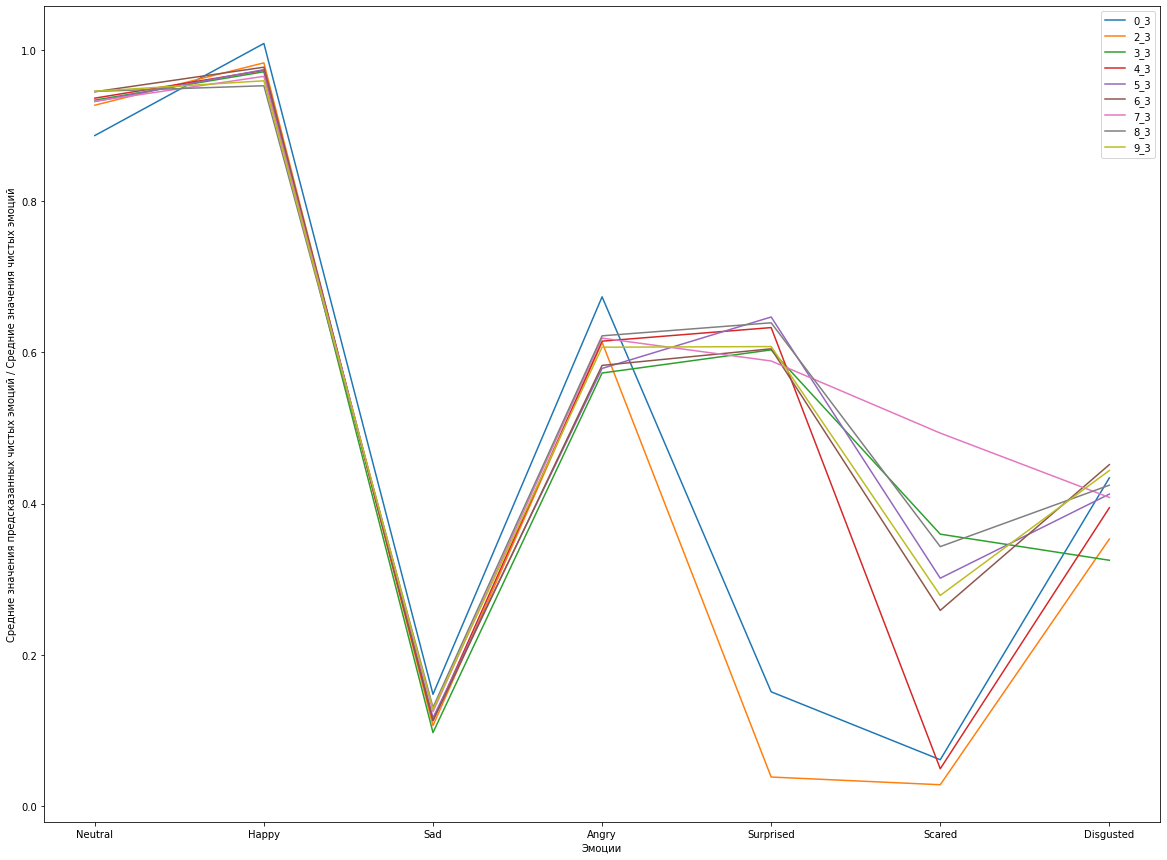

In [144]:
kwargs = {
    'models': models, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_3,
    'scale': True
}
df_clear_metrics_3 = tools.plot_emotions(**kwargs)

In [145]:
df_clear_metrics_3

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,0_3,0.886704,1.008477,0.147877,0.673464,0.151166,0.06134,0.434057,0.480441
1,2_3,0.926843,0.982819,0.106563,0.613434,0.038465,0.028279,0.35321,0.435659
2,3_3,0.933577,0.97104,0.097212,0.572703,0.603311,0.359612,0.325112,0.551795
3,4_3,0.936147,0.972993,0.113071,0.614823,0.63278,0.049403,0.394517,0.530533
4,5_3,0.931697,0.973871,0.116798,0.578751,0.646773,0.301389,0.412587,0.565981
5,6_3,0.944602,0.977104,0.113082,0.582762,0.60473,0.258809,0.451554,0.561806
6,7_3,0.932046,0.964984,0.124897,0.618837,0.588619,0.493256,0.408165,0.590115
7,8_3,0.945071,0.952561,0.130612,0.621892,0.639115,0.343147,0.424382,0.57954
8,9_3,0.94533,0.959115,0.127861,0.606813,0.60769,0.278603,0.44378,0.567027


In [146]:
metrics

['mean', 'norm', 'stat', 'clear']

In [147]:
metric_df_dict = tools.create_metric_df_dict(metrics, df_metrics_3, df_clear_metrics_3)
metric_df_dict

{'mean':   model  layer  N      mean      norm      stat
 0   0_3  first  0  0.082888  0.226499  0.505607
 1   2_3  first  2  0.063172  0.174779  0.478858
 2   3_3  first  3  0.059466  0.163737  0.509206
 3   4_3  first  4  0.056434  0.158508  0.502838
 4   5_3  first  5  0.059345  0.163378  0.513273
 5   6_3  first  6  0.056032  0.156082  0.520813
 6   7_3  first  7  0.057253  0.159472  0.522542
 7   8_3  first  8  0.053823  0.151317  0.516099
 8   9_3  first  9  0.054018  0.151935  0.514208,
 'norm':   model  layer  N      mean      norm      stat
 0   0_3  first  0  0.082888  0.226499  0.505607
 1   2_3  first  2  0.063172  0.174779  0.478858
 2   3_3  first  3  0.059466  0.163737  0.509206
 3   4_3  first  4  0.056434  0.158508  0.502838
 4   5_3  first  5  0.059345  0.163378  0.513273
 5   6_3  first  6  0.056032  0.156082  0.520813
 6   7_3  first  7  0.057253  0.159472  0.522542
 7   8_3  first  8  0.053823  0.151317  0.516099
 8   9_3  first  9  0.054018  0.151935  0.514208,
 '

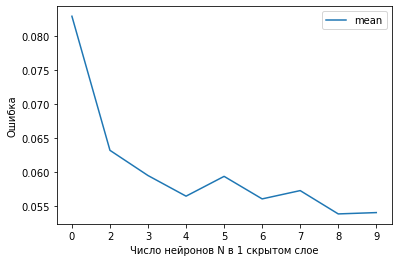

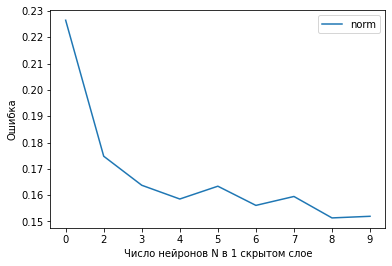

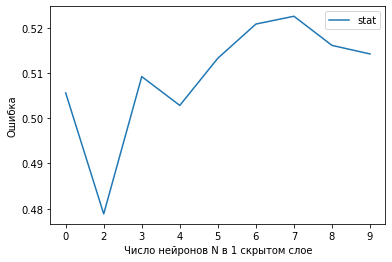

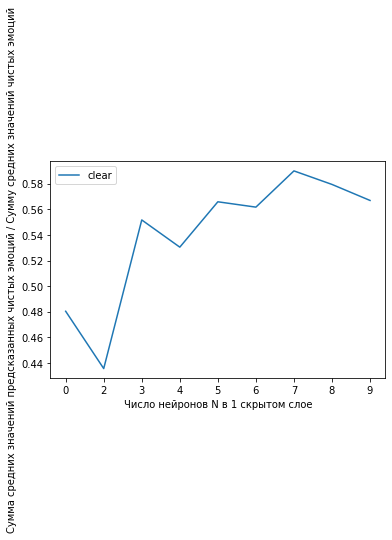

In [149]:
tools.plot_metrics(metric_df_dict)

In [150]:
models

[['0_3', 0, <nn_train.neural_network.NeuralNetwork at 0x7f5bb1567a00>],
 ['2_3', 2, <nn_train.neural_network.NeuralNetwork at 0x7f5c141354f0>],
 ['3_3', 3, <nn_train.neural_network.NeuralNetwork at 0x7f5bf1d8b550>],
 ['4_3', 4, <nn_train.neural_network.NeuralNetwork at 0x7f5bf183c730>],
 ['5_3', 5, <nn_train.neural_network.NeuralNetwork at 0x7f5c2c4835e0>],
 ['6_3', 6, <nn_train.neural_network.NeuralNetwork at 0x7f5c14532580>],
 ['7_3', 7, <nn_train.neural_network.NeuralNetwork at 0x7f5bf1228a00>],
 ['8_3', 8, <nn_train.neural_network.NeuralNetwork at 0x7f5bf18750a0>],
 ['9_3', 9, <nn_train.neural_network.NeuralNetwork at 0x7f5bf18a8280>]]

In [151]:
v

3

In [152]:
tools.save_models(models, path_to_saved_models, layer, v=v)

INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_3/model_first_0_3/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_3/model_first_2_3/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_3/model_first_3_3/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_3/model_first_4_3/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_3/model_first_5_3/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_3/model_first_6_3/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_3/model_first_7_3/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий с

In [153]:
df_metrics_4 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_4

,model,layer,N,mean,norm,stat


In [136]:
v = 4
df_metrics_4 = tools.refitting(models, test, df_metrics_4, v=v)

refit 0_4
Epoch 1/20
286/286 [==============================] - 0s 2ms/step - loss: 0.0205
Epoch 2/20
286/286 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 3/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 4/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 5/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0200
Epoch 6/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0200
Epoch 7/20
286/286 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 8/20
286/286 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 9/20
286/286 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 10/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0199
Epoch 11/20
286/286 [==============================] - 0s 2ms/step - loss: 0.0198
Epoch 12/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0198
Epoch 13/20
286

Epoch 15/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 16/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 17/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 18/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 19/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 20/20
239/239 [==============================] - 0s 2ms/step - loss: 0.0149
{'model': '5_4', 'layer': 'first', 'N': 5, 'mean': 0.076783056448064, 'norm': 0.21442466845165734, 'stat': 0.48683158}
refit 6_4
Epoch 1/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 2/20
237/237 [==============================] - 0s 1ms/step - loss: 0.0157
Epoch 3/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 4/20
237/237 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 5/20
237/237 [==============================] - 0

In [135]:
# v = 4
# for nn_tuple in models:
#     nn = nn_tuple[2]
#     print('refit', nn_tuple[0])
#     df_train = nn.create_train_df_from_diff(test)
#     nn.fit(df_train, epochs=10, batch_size=20)
#     entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
#     entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
#     df_metrics = df_metrics.append(entry_dict, ignore_index = True)
#     print(entry_dict)

In [137]:
df_metrics_4

,model,layer,N,mean,norm,stat
0,0_4,first,0,0.094614,0.259578,0.492493
1,2_4,first,2,0.083476,0.225573,0.465855
2,3_4,first,3,0.078694,0.214279,0.481392
3,4_4,first,4,0.076156,0.211292,0.484052
4,5_4,first,5,0.076783,0.214425,0.486832
5,6_4,first,6,0.073650,0.207223,0.489517
6,7_4,first,7,0.076871,0.213834,0.497891
7,8_4,first,8,0.066942,0.188958,0.494618
8,9_4,first,9,0.067292,0.191321,0.492724


In [138]:
df_clear_metrics_4 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_4

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear


In [139]:
models

[['0_4', 0, <nn_train.neural_network.NeuralNetwork at 0x7f406affd340>],
 ['2_4', 2, <nn_train.neural_network.NeuralNetwork at 0x7f4068704a00>],
 ['3_4', 3, <nn_train.neural_network.NeuralNetwork at 0x7f40505fd0a0>],
 ['4_4', 4, <nn_train.neural_network.NeuralNetwork at 0x7f405053c700>],
 ['5_4', 5, <nn_train.neural_network.NeuralNetwork at 0x7f4031f7dca0>],
 ['6_4', 6, <nn_train.neural_network.NeuralNetwork at 0x7f4050064a60>],
 ['7_4', 7, <nn_train.neural_network.NeuralNetwork at 0x7f4050619340>],
 ['8_4', 8, <nn_train.neural_network.NeuralNetwork at 0x7f40506f2670>],
 ['9_4', 9, <nn_train.neural_network.NeuralNetwork at 0x7f405016e7f0>]]

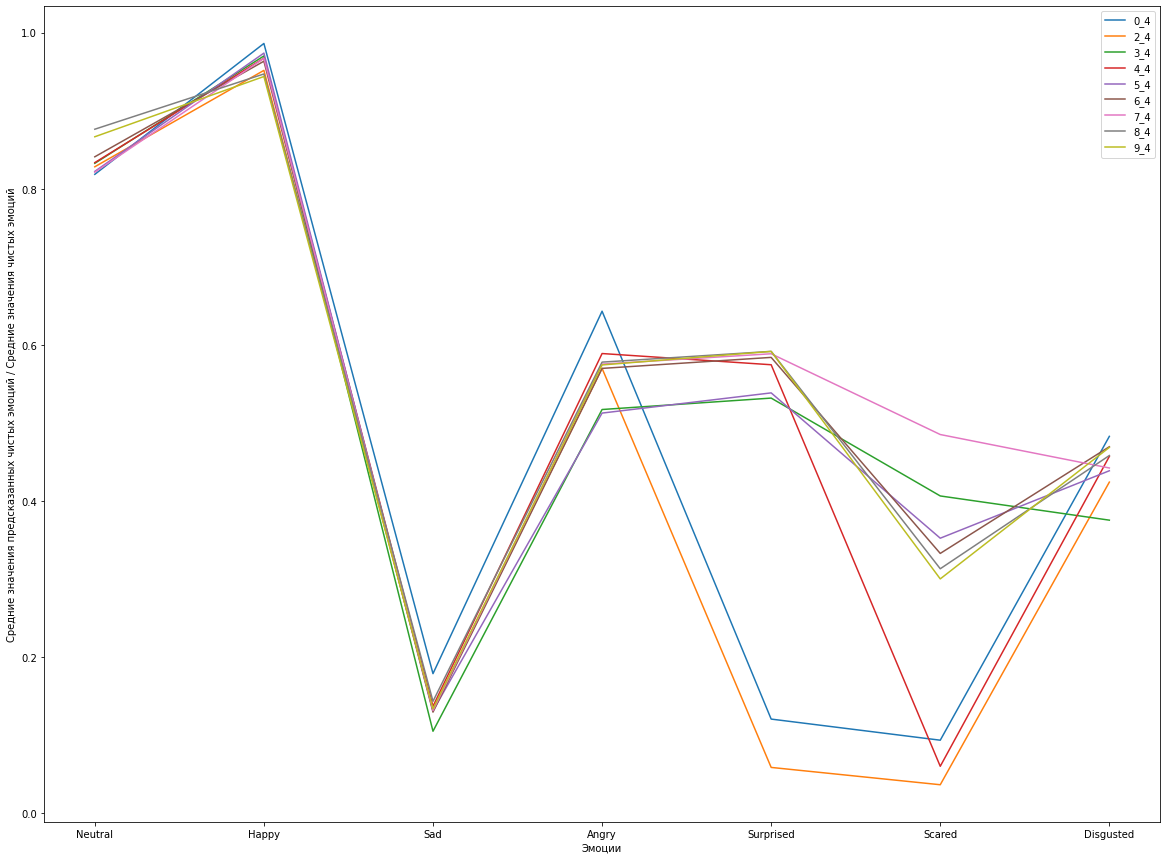

In [140]:
kwargs = {
    'models': models, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_4,
    'scale': True
}
df_clear_metrics_4 = tools.plot_emotions(**kwargs)

In [141]:
df_clear_metrics_4

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,0_4,0.818420,0.986009,0.179035,0.643151,0.120850,0.093810,0.482891,0.474881
1,2_4,0.828096,0.951535,0.132910,0.569980,0.058954,0.036779,0.424297,0.428936
2,3_4,0.832530,0.970015,0.105276,0.517268,0.531892,0.406578,0.375581,0.534163
3,4_4,0.833437,0.967130,0.137226,0.588942,0.574600,0.060396,0.457229,0.516994
4,5_4,0.822216,0.973666,0.131447,0.512695,0.538564,0.352483,0.438844,0.538559
5,6_4,0.840888,0.963285,0.129784,0.569917,0.584012,0.332995,0.469619,0.555786
6,7_4,0.821167,0.966981,0.131832,0.575415,0.588646,0.485237,0.442394,0.573096
7,8_4,0.876200,0.946952,0.143636,0.577957,0.591717,0.313352,0.458346,0.558308
8,9_4,0.866540,0.943689,0.133909,0.574338,0.591669,0.300372,0.468754,0.554182


In [142]:
metrics

['mean', 'norm', 'stat', 'clear']

In [144]:
metric_df_dict = tools.create_metric_df_dict(metrics, df_metrics_4, df_clear_metrics_4)
metric_df_dict

{'mean':   model  layer  N      mean      norm      stat
 0   0_4  first  0  0.094614  0.259578  0.492493
 1   2_4  first  2  0.083476  0.225573  0.465855
 2   3_4  first  3  0.078694  0.214279  0.481392
 3   4_4  first  4  0.076156  0.211292  0.484052
 4   5_4  first  5  0.076783  0.214425  0.486832
 5   6_4  first  6  0.073650  0.207223  0.489517
 6   7_4  first  7  0.076871  0.213834  0.497891
 7   8_4  first  8  0.066942  0.188958  0.494618
 8   9_4  first  9  0.067292  0.191321  0.492724,
 'norm':   model  layer  N      mean      norm      stat
 0   0_4  first  0  0.094614  0.259578  0.492493
 1   2_4  first  2  0.083476  0.225573  0.465855
 2   3_4  first  3  0.078694  0.214279  0.481392
 3   4_4  first  4  0.076156  0.211292  0.484052
 4   5_4  first  5  0.076783  0.214425  0.486832
 5   6_4  first  6  0.073650  0.207223  0.489517
 6   7_4  first  7  0.076871  0.213834  0.497891
 7   8_4  first  8  0.066942  0.188958  0.494618
 8   9_4  first  9  0.067292  0.191321  0.492724,
 '

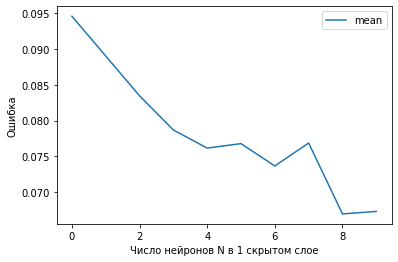

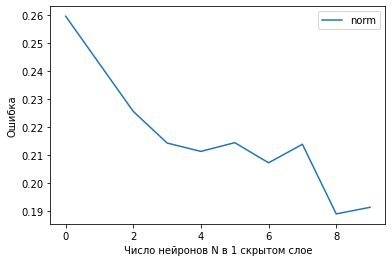

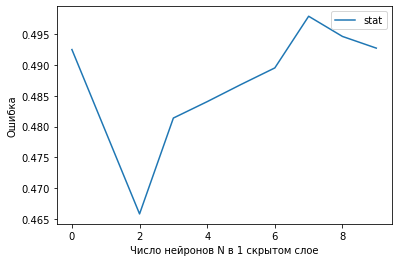

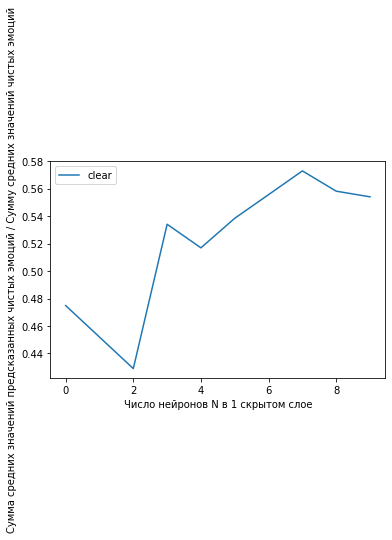

In [145]:
tools.plot_metrics(metric_df_dict)

In [146]:
models

[['0_4', 0, <nn_train.neural_network.NeuralNetwork at 0x7f406affd340>],
 ['2_4', 2, <nn_train.neural_network.NeuralNetwork at 0x7f4068704a00>],
 ['3_4', 3, <nn_train.neural_network.NeuralNetwork at 0x7f40505fd0a0>],
 ['4_4', 4, <nn_train.neural_network.NeuralNetwork at 0x7f405053c700>],
 ['5_4', 5, <nn_train.neural_network.NeuralNetwork at 0x7f4031f7dca0>],
 ['6_4', 6, <nn_train.neural_network.NeuralNetwork at 0x7f4050064a60>],
 ['7_4', 7, <nn_train.neural_network.NeuralNetwork at 0x7f4050619340>],
 ['8_4', 8, <nn_train.neural_network.NeuralNetwork at 0x7f40506f2670>],
 ['9_4', 9, <nn_train.neural_network.NeuralNetwork at 0x7f405016e7f0>]]

In [158]:
v

4

In [160]:
tools.save_models(models, path_to_saved_models, layer, v=v)

INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_4/model_first_0_4/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_4/model_first_2_4/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_4/model_first_3_4/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_4/model_first_4_4/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_4/model_first_5_4/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_4/model_first_6_4/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_4/model_first_7_4/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий с

In [161]:
models

[['0_3', 0, <nn_train.neural_network.NeuralNetwork at 0x7f5bb1619190>],
 ['2_3', 2, <nn_train.neural_network.NeuralNetwork at 0x7f5bb1844dc0>],
 ['3_3', 3, <nn_train.neural_network.NeuralNetwork at 0x7f5bb162b250>],
 ['4_3', 4, <nn_train.neural_network.NeuralNetwork at 0x7f5bb1e6e700>],
 ['5_3', 5, <nn_train.neural_network.NeuralNetwork at 0x7f5bd0e8db50>],
 ['6_3', 6, <nn_train.neural_network.NeuralNetwork at 0x7f5bd09ea670>],
 ['7_3', 7, <nn_train.neural_network.NeuralNetwork at 0x7f5bb1cf9c40>],
 ['8_3', 8, <nn_train.neural_network.NeuralNetwork at 0x7f5bd019cf40>],
 ['9_3', 9, <nn_train.neural_network.NeuralNetwork at 0x7f5bd0a644c0>]]

In [162]:
df_train_, df_test = nn.train_test_split(full_df_list, percent_df_list)
df_train_

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:01.181_Korsakov_1,0.95,0.00,0.03,0.05,0.01,0.00,0.01,-0.07,0.25
00:01:33.500_Бондаренко Денис_2,0.93,0.07,0.00,0.02,0.04,0.00,0.00,0.05,0.32
00:00:07.900_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.00,0.99,-0.99,0.63
00:00:02.727_Керов Андрей_8,0.99,0.00,0.01,0.01,0.01,0.00,0.00,-0.01,0.25
00:00:05.212_Korsakov_6,0.81,0.00,0.00,0.02,0.04,0.05,0.00,-0.05,0.52
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.00,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.00,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.00,0.99,-0.99,0.62


In [163]:
df_metrics_5 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_5

,model,layer,N,mean,norm,stat


In [154]:
v = 5
df_metrics_5 = tools.refitting(models, test, df_metrics_5, df_train=df_train_, v=v, type_='split')

refit 0_5
Epoch 1/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0115
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0113
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0113
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0113
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0112
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0112
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0112
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0112
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0112
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0112
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0112
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0111
Epoch 13/20
916

Epoch 15/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0061
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 17/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0060
Epoch 18/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0060
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0060
Epoch 20/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0060
{'model': '5_5', 'layer': 'first', 'N': 5, 'mean': 0.058032436065561056, 'norm': 0.1607271486480875, 'stat': 0.5337458}
refit 6_5
Epoch 1/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0063
Epoch 2/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 3/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0058
Epoch 5/20
916/916 [==============================] - 

In [152]:
# v = 5
# for nn_tuple in models:
#     nn = nn_tuple[2]
#     print('refit', nn_tuple[0])
#     nn.fit(df_train, epochs=5, batch_size=20)
#     entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
#     entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
#     df_metrics = df_metrics.append(entry_dict, ignore_index = True)
#     print(entry_dict)

In [155]:
df_metrics_5

,model,layer,N,mean,norm,stat
0,0_5,first,0,0.082484,0.226055,0.510195
1,2_5,first,2,0.063234,0.175214,0.480043
2,3_5,first,3,0.059553,0.163531,0.520192
3,4_5,first,4,0.056381,0.158886,0.504277
4,5_5,first,5,0.058032,0.160727,0.533746
5,6_5,first,6,0.055141,0.153872,0.535042
6,7_5,first,7,0.057033,0.159337,0.531546
7,8_5,first,8,0.053418,0.150329,0.524923
8,9_5,first,9,0.053827,0.150966,0.524741


In [156]:
df_clear_metrics_5 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_5

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear


In [157]:
models

[['0_5', 0, <nn_train.neural_network.NeuralNetwork at 0x7f406affd340>],
 ['2_5', 2, <nn_train.neural_network.NeuralNetwork at 0x7f4068704a00>],
 ['3_5', 3, <nn_train.neural_network.NeuralNetwork at 0x7f40505fd0a0>],
 ['4_5', 4, <nn_train.neural_network.NeuralNetwork at 0x7f405053c700>],
 ['5_5', 5, <nn_train.neural_network.NeuralNetwork at 0x7f4031f7dca0>],
 ['6_5', 6, <nn_train.neural_network.NeuralNetwork at 0x7f4050064a60>],
 ['7_5', 7, <nn_train.neural_network.NeuralNetwork at 0x7f4050619340>],
 ['8_5', 8, <nn_train.neural_network.NeuralNetwork at 0x7f40506f2670>],
 ['9_5', 9, <nn_train.neural_network.NeuralNetwork at 0x7f405016e7f0>]]

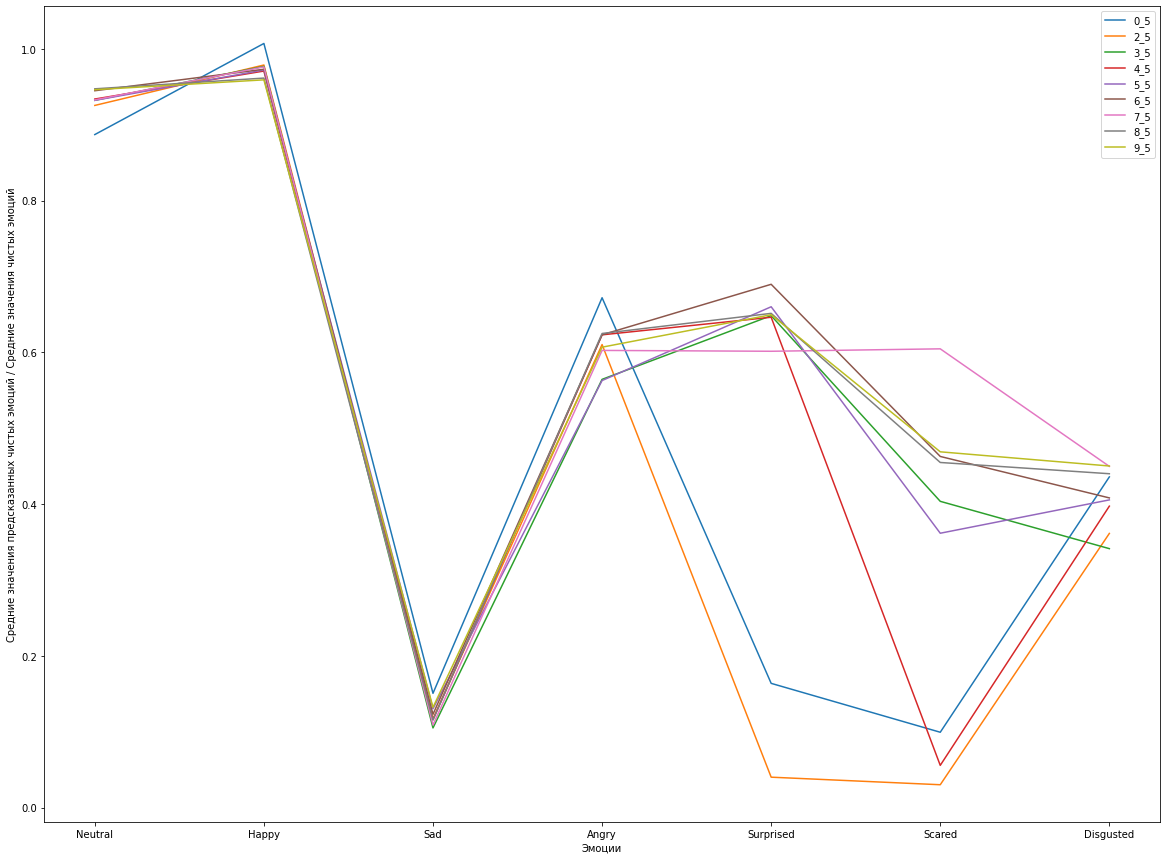

In [158]:
kwargs = {
    'models': models, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_5,
    'scale': True
}
df_clear_metrics_5 = tools.plot_emotions(**kwargs)

In [159]:
df_clear_metrics_5

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,0_5,0.886934,1.006987,0.150666,0.671938,0.163799,0.099373,0.435850,0.487935
1,2_5,0.925331,0.978591,0.117001,0.610225,0.040166,0.030211,0.361352,0.437554
2,3_5,0.932106,0.976792,0.105079,0.564381,0.648300,0.403654,0.341313,0.567375
3,4_5,0.933762,0.970644,0.115981,0.623048,0.646227,0.055749,0.397298,0.534673
4,5_5,0.932022,0.972029,0.130341,0.562818,0.660030,0.361623,0.405551,0.574916
5,6_5,0.944704,0.972995,0.123069,0.623086,0.689638,0.462795,0.408159,0.603492
6,7_5,0.932652,0.976128,0.108907,0.602512,0.601398,0.604597,0.449717,0.610844
7,8_5,0.947217,0.961370,0.115475,0.624835,0.651345,0.454853,0.440024,0.599303
8,9_5,0.946048,0.959038,0.132195,0.606783,0.649554,0.468903,0.450213,0.601819


In [160]:
metrics

['mean', 'norm', 'stat', 'clear']

In [162]:
metric_df_dict = tools.create_metric_df_dict(metrics, df_metrics_5, df_clear_metrics_5)
metric_df_dict

{'mean':   model  layer  N      mean      norm      stat
 0   0_5  first  0  0.082484  0.226055  0.510195
 1   2_5  first  2  0.063234  0.175214  0.480043
 2   3_5  first  3  0.059553  0.163531  0.520192
 3   4_5  first  4  0.056381  0.158886  0.504277
 4   5_5  first  5  0.058032  0.160727  0.533746
 5   6_5  first  6  0.055141  0.153872  0.535042
 6   7_5  first  7  0.057033  0.159337  0.531546
 7   8_5  first  8  0.053418  0.150329  0.524923
 8   9_5  first  9  0.053827  0.150966  0.524741,
 'norm':   model  layer  N      mean      norm      stat
 0   0_5  first  0  0.082484  0.226055  0.510195
 1   2_5  first  2  0.063234  0.175214  0.480043
 2   3_5  first  3  0.059553  0.163531  0.520192
 3   4_5  first  4  0.056381  0.158886  0.504277
 4   5_5  first  5  0.058032  0.160727  0.533746
 5   6_5  first  6  0.055141  0.153872  0.535042
 6   7_5  first  7  0.057033  0.159337  0.531546
 7   8_5  first  8  0.053418  0.150329  0.524923
 8   9_5  first  9  0.053827  0.150966  0.524741,
 '

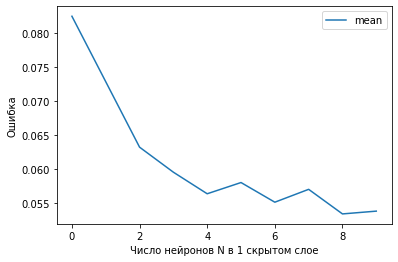

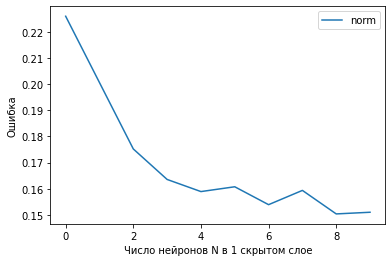

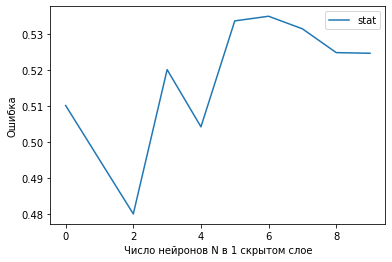

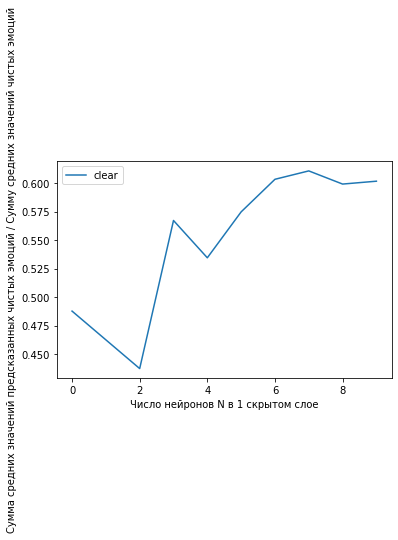

In [163]:
plot_metrics(metric_df_dict)

In [164]:
models

[['0_5', 0, <nn_train.neural_network.NeuralNetwork at 0x7f406affd340>],
 ['2_5', 2, <nn_train.neural_network.NeuralNetwork at 0x7f4068704a00>],
 ['3_5', 3, <nn_train.neural_network.NeuralNetwork at 0x7f40505fd0a0>],
 ['4_5', 4, <nn_train.neural_network.NeuralNetwork at 0x7f405053c700>],
 ['5_5', 5, <nn_train.neural_network.NeuralNetwork at 0x7f4031f7dca0>],
 ['6_5', 6, <nn_train.neural_network.NeuralNetwork at 0x7f4050064a60>],
 ['7_5', 7, <nn_train.neural_network.NeuralNetwork at 0x7f4050619340>],
 ['8_5', 8, <nn_train.neural_network.NeuralNetwork at 0x7f40506f2670>],
 ['9_5', 9, <nn_train.neural_network.NeuralNetwork at 0x7f405016e7f0>]]

In [165]:
v

5

In [167]:
tools.save_models(models, path_to_saved_models, layer, v=v)

INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_5/model_first_0_5/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_5/model_first_2_5/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_5/model_first_3_5/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_5/model_first_4_5/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_5/model_first_5_5/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_5/model_first_6_5/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/saved_models/first/_5/model_first_7_5/assets
INFO:tensorflow:Assets written to: /home/ivan/Рабочий с

In [168]:
models

[['0_3', 0, <nn_train.neural_network.NeuralNetwork at 0x7f5bb1cf5310>],
 ['2_3', 2, <nn_train.neural_network.NeuralNetwork at 0x7f5bb1e80e20>],
 ['3_3', 3, <nn_train.neural_network.NeuralNetwork at 0x7f5bb16298e0>],
 ['4_3', 4, <nn_train.neural_network.NeuralNetwork at 0x7f5bf18c76a0>],
 ['5_3', 5, <nn_train.neural_network.NeuralNetwork at 0x7f5bb1c96bb0>],
 ['6_3', 6, <nn_train.neural_network.NeuralNetwork at 0x7f5bb1264730>],
 ['7_3', 7, <nn_train.neural_network.NeuralNetwork at 0x7f5bb16db5b0>],
 ['8_3', 8, <nn_train.neural_network.NeuralNetwork at 0x7f5bb1f53310>],
 ['9_3', 9, <nn_train.neural_network.NeuralNetwork at 0x7f5bb19dd4f0>]]

### Ниже - старое (возможно, НЕКЛИКАБЕЛЬНО)

In [402]:
metrics

['mean', 'norm', 'stat']

In [396]:
x = [[] for _ in range(len(metrics))]
y = [[] for _ in range(len(metrics))]

In [399]:
for i, metric in enumerate(metrics):
    x[i].append(df_metrics[4 * (n // v):]['N'])
    y[i].append(df_metrics[4 * (n // v):][metric])

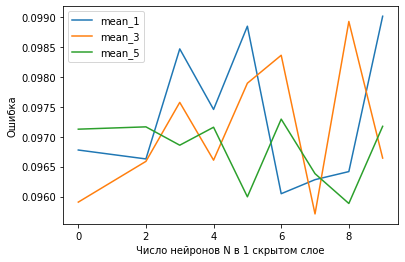

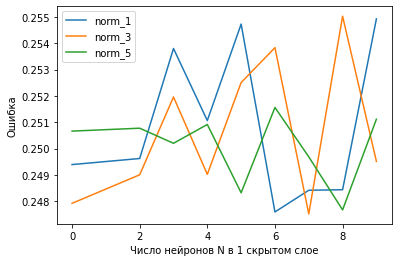

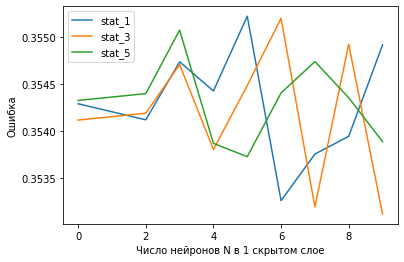

In [401]:
for i in range(len(metrics)):
    for j in range(len(x[i])):
        plt.plot(x[i][j], y[i][j], label=metrics[i] + f'_{j * 2 + 1}')
    plt.xlabel("Число нейронов N в 1 скрытом слое")
    plt.ylabel("Ошибка")
    plt.legend()
    plt.show()

### Разработка функции apply_float() для NN.tools модуля

In [6]:
def apply_float(df_, columns):
    for field in columns:
        df_[field] = df_[field].apply(lambda el: float(el))

### Использование функции apply_float()

In [7]:
fields

['Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal']

In [8]:
apply_float(df, fields)

In [9]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.940782,0.000023,0.023035,0.056517,0.019016,0.000197,0.000878,-0.056494,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [10]:
df['Neutral']

0        0.987859
1        0.987882
2        0.987905
3        0.987929
4        0.988026
           ...   
20842    0.931563
20843    0.935643
20844    0.938411
20845    0.940782
20846    0.942106
Name: Neutral, Length: 25321, dtype: float64

In [11]:
df['Action_Unit_12___Right___Lip_Corner_Puller']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
20842    0.0
20843    0.0
20844    0.0
20845    0.0
20846    0.0
Name: Action_Unit_12___Right___Lip_Corner_Puller, Length: 25321, dtype: object

### Разработка функции make_valid_df() для NN.tools модуля

In [15]:
def make_valid_df(df_, columns=None):
    if columns is not None:
        apply_float(df_, columns)
    df_.index = df_['Index_']

In [16]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [17]:
make_valid_df(df, fields)

In [18]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
